<h1>Roomba Coverage</h1> 

<h2>Overview</h2>

<h3>Introduction</h3>

A Roomba is a robotic vacuum cleaner that automatically moves around a room or a house to clean the floor. A Roomba can use different strategies to navigate a room and clean it, with each strategy having its own strengths and weaknesses in terms of cleaning efficiency (Woodford, 2018). 

In this assignment, I will compare and contrast the efficiency of various Roomba strategies by modeling the Roomba as a moving unit on an integer grid and conducting a Monte Carlo experiment. To run a Monte Carlo experiment, simulations that contain elements of randomness are run multiple times to generate a result consisting of a range of values (number of values == number of simulations run), thus allowing us to assess the level of probability and/or certainty surrounding that value.

<h3>Object Representation</h3>

The three main elements in the simulation are the floor, the obstacles, and the Roomba. Walls are considered a type of fixed obstacle - they always occupy the outer border of the floor and do not change position across simulations.

<h4>The Floor</h4>

The floor is represented as a square grid of size x size, where size is a user input. For example, if size is 5, a 5 x 5 grid will be generated with 25 cells. The 25 cells are explorable by the Roomba unless there is an obstacle on them, or they are surrounded by obstacles in such a way that there is no opening for the Roomba to reach that part of the floor (this is an undesirable situation, but will occassionally occur given the random nature of the obstacle placement).

Empty spots on the floor are represented with the integer `-1` when creating the simulation, and string `.` when displaying the simulation.

<h4>The Obstacles</h4>

The obstacles are represented as units on the square grid. Each obstacle generated occupies one cell on the grid; neighboring obstacles that are located side-by-side can be interpreted as a large object by the user, but are still counted as individual objects when the Roomba sim class generates and calculates the floor's obstacle density. 

The obstacle density is a user input and can range from 0 to 0.99 - any value greater than 0.99 is not allowed since then the entire floor will be covered by obstacles. The number of obstacles to be placed on the floor grid is calculated as `obstacle_count = obstacle_density x size x size`.

Since the number of obstacles placed has to be an integer value, the result of `obstacle_count` will be transformed into an integer using the `int` function, which ends up rounding down the value. For example, `0.99 * 5 * 5 = 24.75; int(24.75) = 24`. As such, the user can go up to 0.99 obstacle density without ever covering the entire floor grid. That being said, when the Roomba sim class detects that the roomba is trapped on all sides by an object - as will be inevitable with a 0.99 obstacle density - the simulation will break out of the update loop and end.

The obstacle positions are generated randomly each time, thus introducing randomness into each simulation.

Obstacles are represented with the integer `1` when creating the simulation, and string `X` when displaying the simulation.

<h4>The Roomba</h4>

The Roomba is represented as a single unit on the square grid. The Roomba's starting location is randomly initialized each simulation by listing the cells on the floor that aren't occupied by an obstacle, and randomly placing the Roomba on one those empty cells.

The Roomba's field of vision and movement follow a Moore neighborhood configuration, i.e. given that the Roomba occupies a single cell on the grid, it is capable of detecting obstacles in and moving to any of the 8 cells surrounding it as long as those cells are not occupied by an obstacle.

The Roomba's strategy will determine the way it chooses the next cell to move to. The four strategies will be elaborated below, but generally speaking, only the 'wall_following' strategy makes use of the Roomba's field of vision to decide on the next position. 

The Roomba is represented with the integer `0` when creating the simulation, and string `O` when displaying the simulation. The Roomba's Moore neighborhood field of vision and movement range are colored in red.

<h4>The Walls</h4>

The walls are represented as fixed obstacles that make up the border of the floor. Given a fixed floor size, the walls never change position. Since the walls are represented as obstacles, they are also represented with the integer `1` when creating the simulation, and string `X` when displaying the simulation.

<h3>Roomba Strategies</h3>

For this experiment, the four strategies to be implemented by the Roomba are random bounce, wall-following, one-step memory, and multi-step memory. In all the strategies, we assume that the next position must always be within the Roomba's immediate Moore neighborhood. That is, it is impossible for the Roomba to move to a cell that it is not located next to.

Each of the strategies require certain conditions to be met in order to be implemented by the Roomba. The wall-following, one-step memory, and multi-step memory strategies will default to random bounce behavior if their conditions are not met. 

<h4>Random Bounce</h4>

In the random bounce strategy, as long as a cell within the Moore neighborhood is not occupied by an obstacle, then the Roomba has a random chance of moving to it. Given set $N$ representing the Roomba's Moore neighborhood, and set $O$ representing the cells on the floor grid that contain obstacles, the possible next positions, $P$, for the Roomba can be obtained by calculating $P_{rb} = N - O$. The next move is picked from $P$ with a random uniform probability.

<h4>One-Step Memory</h4>

The one-step memory strategy extends on the random bounce strategy by avoiding any obstacle-occupied cells and choosing randomly from any remaining obstacle-free cells within the Moore neighborhood _that were not its most recent position_. That is, given set $N$ representing the Roomba's Moore neighborhood, set $O$ representing the obstacle-occupied cells within the entire grid, and a set of length one $Z_{one}$ that represents the Roomba's most recent position, the available options for next moves are given by $P_{os} = N - O - Z_{one}$. Since it is possible that the Roomba has nowhere else to move to except to backtrack to its most recent position - for example, if all other positions are occupied by obstacles - the strategy only applies if $P_{os} = N - O - Z_{one} >= 1$. 

If $P_{os} = N - O - Z_{one} >= 1$, the Roomba randomly chooses its next position from set $P_{os}$. Else, it defaults to the random bounce strategy and just chooses from $P_{rb} = N - O$, i.e. it has no other choice but to backtrack.

This strategy is meant to encourage the Roomba to explore new areas of the grid as opposed to circling around the same area - which has a higher probability of occuring with random bounce.

<h4>Multi-Step Memory</h4>

The multi-step memory strategy extends on the one-step memory strategy. Instead of simply remembering the most recent position, i.e. a set $Z_{one}$ of length 1 - a sequence of all previous positions are retained within the Roomba's memory. This set of all previous positions will be assigned the notation $Z_{all}$, and can - and in most cases, should - have length > 1. The only cases where $Z_{all} \leq 1$ would be either a) the Roomba is completely surrounded by obstacles and so cannot move at all, i.e. 8/8 neighborhood cells are occupied by obstacles; or b) 7/8 neighborhood cells are occupied by obstacles, and so the Roomba can only move back the way it came from.

The list of available next positions are then given by $P_{ms} = N - O - Z_{all}; (N: $neighborhood cells, $O: $all obstacle-occupied cells on grid, $Z_{all}:$set of all previous positions of the Roomba$)$. Once again, $P_{ms} = N - M - Z_{all}\geq 1$ must hold for the strategy to be applied; else, it just defaults to the random bounce strategy.

The multi-step memory strategy encourages the Roomba to explore an even wider terrain of the grid vs the one-step memory strategy, since the Roomba tries to avoid _any_ of its previous locations.

<h4>Wall-Following</h4>

In the wall-following strategy, the Roomba scans the 3 cells to its top, bottom, left, and right in order to detect a series of 3 obstacles in a row. When a series of 3 obstacles is detected, the Roomba will assume that the 3-cell obstacle is a wall, and proceed to move alongside it, thus "following the wall" as it cleans.

<h5>General algorithm</h5>

The general wall-following algorithm is as follows:

1) <b>Detect presence of wall</b> (or a long obstacle, which can be mistaken as a wall) by checking whether the top-bottom sensor coordinates, or right-left sensor coordinates can be found within the set of obstacle coordinates.

2) If condition 1 is true, <b>check whether the Roomba was already previously moving alongside the wall. If it was, keep moving in a direction that ensures a straight path.</b> For example, if the Roomba was already moving horizontally alongside a top/bottom wall, keep moving horizontally _without backtracking to the previous location_. <b>If the Roomba was not already moving alongside the wall, randomly pick from the positions that enable it to do so.</b>

3) Lastly, check for obstacles. <b>If there are obstacles in the picked direction, switch Roomba orientation by 90 degrees and try to pick from those directions instead.</b> For example, if a Roomba had picked Left, but there is an obstacle, switch to either up or down. This encourages the Roomba to start cleaning the connecting wall when it bumps into a corner.

4) A final obstacle check is conducted to see whether the Roomba is able to change directions by 90 degrees. <b>If there are obstacles in the way even then, the Roomba defaults to random bounce behavior.</b>

<h5>Detailed breakdown</h5>

Given the sets of $T, B, R, L$ representing the top 3 cells, bottom 3 cells, right 3 cells, and left 3 cells of the Roomba's Moore neighboor respectively, and $O$ representing all obstacle positions on the floor, the Roomba's wall-detection can be carried out as follows:

<h5>1) Check for top or bottom walls.</h5>

Check if $T$ or $B$ is in $O$. If so, the Roomba believes that there is a top or bottom wall, and proceeds to choose its next move from the available horizontal positions, i.e. left or right. The Roomba implements the one-step memory strategy here by going left if its previous position was right, and going right if its previous position was left. This ensures that the Roomba keeps moving in a straight horizontal line, and does not simply alternate between right and left within a limited range of cells. If the previous position was neither right or left, then the Roomba randomly chooses between the two for its next step.

As a final check, the Roomba ensures that there are no obstacles in the way of the chosen horizontal next step. If there are, the Roomba tries to change its direction be vertical instead, i.e. to move either up or down (as opposed to diagonally). This is meant to encourage the Roomba to start moving alongside the other walls when it reaches a corner. If there are obstacles in the vertical direction as well, the Roomba defaults to random bounce behavior.

<h5>2) Check for right or left walls.</h5>

The procedure for checking for top and bottom walls can be applied to checking the right and left walls as well. That is, check if $R$ or $L$ is in $O$. If so, the Roomba believes that there is a right or left wall, and proceeds to choose its next move from the available vertical positions, i.e. top or bottom. If the Roomba's previous position was at the bottom, its next move should be the top; if its previous position was at the top, its next move should be the bottom. This ensures that it keeps moving in a straight line alongside the wall, and does not get stuck alternating between up and down movements. If the previous position was neither top or bottom, then the Roomba randomly chooses between the two for its next step.

The obstacle final check is carried out: if there are any obstacles in the chosen vertical positions, the Roomba tries to move to a horizontal position, i.e. left or right. This design choice is meant to encourage the Roomba to start cleaning the other walls when it hits a corner. If there are obstacles in the horizontal positions as well, then the Roomba defaults to random bounce behavior.

<h5>Note</h5>

Since the top-bottom wall check is carried out before the right-left wall check, the Roomba will always prioritize moving alongside a top-bottom wall vs a right-left wall given that both are within its range of vision. That is, until it bumps into an obstacle (which it will assume to be a corner) and carries out the procedure of switching its orientation from vertical to horizontal movement.

This decision was arbitrary on my part, and ideally, I would make the Roomba randomly choose between which check it should conduct first. While the order of the checks could be problematic if the floor has different width and height dimensions, since the floor is a square and obstacle positions are randomly generated for each simulation, I assume that setting the top-bottom check to always run first should not affect the results significantly.


<h3>Efficiency Metrics</h3>

Various metrics are used to measure the Roomba's efficiency at floor-cleaning. Metrics are important since they allow us to determine how effective each of the cleaning strategies are in various domains, e.g. coverage, speed, energy consumption.

<h4>Ratio of Floor Cleaned</h4>

The ratio of floor cleaned is measured by dividing the number of _unique_ tiles cleaned by the number of _obstacle-free_ tiles. 

Mathematically, given a set $R_{all}$ of all the Roomba's _unique_ previous locations, i.e. no repeats, and given a set of obstacles-free tiles represented by $F =$ total number of tiles $-$ total number of obstacle-occupied tiles, the ratio cleaned is obtained via the following equation: `len(R) / len(F)`; where the `len()` function is used to retrieve the length of the sets.

The ratio of floor cleaned metric is important since it provides insight as to whether the Roomba was able to clean a large proportion of the room, or whether it just kept circling among the same tiles. Higher ratios indicate a more efficient Roomba; lower ratios indicate a less-efficient Roomba (in terms of floor coverage). If the Roomba successfully cleans all floor tiles, the ratio will be 1. 

<h4>Rate of Cleaning</h4>

The rate of cleaning measures the number of _unique_ tiles cleaned per time-step in the simulation. Given a set of all previous locations, $R_{all}$, which consists of only unique values, the cleaning rate is measured as `len(R)/time`, where `time` represents the cumulative time-steps as carried out by the update function in the simulation.

The cleaning rate provides insight as to how efficient the Roomba is in terms of cleaning speed. It complements the ratio of floor cleaned well since both coverage and speed efficiency are important aspects to consider when buying a Roomba.

A high cleaning rate indicates high efficiency; a low cleaning rate indicates low efficiency. A cleaning rate of 1 indicates that the Roomba is cleaning 1 unique tile per time-step, e.g. in 10 time-steps, the Roomba has cleaned 10 tiles.

<h4>Average Number of Repeats per Tile</h4>

In both the metrics above, the number of _unique_ tiles cleaned is considered since a Roomba should be evaluated based on each new tile that it is cleaning vs repeatedly cleaning a limited range of tiles.

To understand the extent of the Roomba's repetitive cleaning behavior, this metric is used to measure the average number of times that the Roomba cleans the same tile. For example, if tile A was cleaned 10 times and tile B was cleaned 2 times, the average number of repeats per tile would be $(10 + 2)/2 = 6$. While one could argue that a Roomba with such an uneven distribution should be considered less efficient than a Roomba that cleans tiles A and B evenly, e.g. $6$ times each, I chose to simply take the average for convenience, thus also imposing the assumption that each repeat in the simulation is assigned an equal weight, irregardless of whether it was skewed towards heavy repetition on only one tile, or whether the repetitions were evenly distributed.

Given a counter $C$ which measures the number of repeat cleans per floor tile in the `key: value` format of `tile: number of repeats`, the average number of repeats per tile is measured as the sum of $C$'s values divided by the total number of keys in $C$. In Python code, this would be written as `sum(C.values)/len(C)`.

A high average number of repeats indicates low efficiency; a low average number of repeats indicates high efficiency. Since the returned value is not a ratio, the best performance would be a value of 1, indicating that each tile is only cleaned once, whereas the worst performance would be equal to the number of total time-steps, suggesting that the Roomba just cleaned the same tile throughout the whole simulation. That being said, in my simulations I chose to end the simulation whenever the Roomba was boxed in on all sides by obstacles, so the worst possible performance in my simulations would be half the number of total time-steps - indicating that the Roomba kept alternating between two tiles for the entire simulation.

<h3>Assumptions and Limitations</h3>

- The Roomba's performance on a square grid is sufficiently generalizable to its performance on floors of other shapes. This assumption fails when we consider that the wall-following strategy would not work as intended at all on a circular floor, but for now, we assume that most rooms are square or at least rectangular in shape.


- The Roomba is unable to clean under obstacles. In real life, there are obstacles that the Roomba can clean under, e.g. tables. In the simulation, obstacles that can be cleaned under - such as tables - are assumed to be sufficiently represented by the obstacle-free cells.


- The Roomba cleans every tile that it lands on, and the tiles' level of cleanliness are equal irregardless of how many times the Roomba repeatedly moves across them. This assumption is fair considering that most floors do not accumulate noticeable dirt within the time-span that the Roomba is cleaning.


- The Roomba's cleaning mechanism, e.g. vacuum power, operates at the same level throughout the simulation and at any location on the floor. In real life, the Roomba can have weaker vacuum power at different levels of energy and on different floor textures. We assume a basic floor texture and constant energy level that maintains the Roomba at consistent vacuuming power throughout.


- The Roomba does not need to recharge throughout the simulation. Roomba's often need to recharge after cleaning for a given amount of time. They also are programmed to automatically find their recharging dock and resume cleaning after recharging. In this simulation, we assume that the number of time-steps is small enough that the Roomba does not need to recharge.


- The Roomba only comes in one size. Roomba's can come in different sizes - one would imagine that there are pros and cons of different sizes, e.g. big Roombas can clean more tiles per time-step, but small Roomba's can fit into corners. In this case, we assume one constant size and no comparisons are made between different sizes.


- Room does not have any 'moving obstacles' at time of cleaning. Oftentimes, there are moving obstacles such as people or pets in the room even while the Roomba is cleaning. In this case, we assume that the room does not contain moving obstacles and this is justified by the fact that Roombas are noisy and most people (and pets) would move to another room when the Roomba is cleaning.

<h4>Summary of Assumptions</h4>

Overall, I think that the assumptions are fair with perhaps only the recharging assumption being the most "unrealistic" since in my personal experience, Roombas run out of power very quickly and constantly need to recharge. As such, a strategy that takes this into consideration by making the Roomba start cleaning near the charging dock when energy is low may be worth exploring in the future.

<h2>Python Implementation</h2>

The Roomba simulation is implemented in Python by creating a RoombaSim class. The parameters of the class include floor size, obstacle density, and cleaning strategy. There are additional demo and verbose parameters that simply control whether the class should display the simulation and captions respectively.

A brief description of the parameters are given below, with further explanations in the code and comments:

<h4>size</h4>

Needs a minimum value of 1, and has no maximum value, though the user should bear in mind the implications of having a 1 x 1 floor grid or a 1000 x 1000 floor grid. In the former case, the Roomba simulation will keep terminating since the Roomba is constantly boxed in by obstacles, aka the walls. In the latter, the time-steps has to be adjusted appropriately to accurately evaluate the Roomba's performance.

<h4>obstacle_density</h4>

Has to be < 1. If obstacle density == 0, the floor will have no obstacles (except for the 4 bordering walls). If obstacle_density >= 1, the class will raise a ValueError since there is no space to place the Roomba and the simulation will be meaningless. 

<h4>strat</h4>

The floor-cleaning strategy to be used in the simulation. Available values are random_bounce, one_step_memory, multi_step_memory, and wall_following. If any other value is used, the simulation will default to the random bounce strategy.

<h4>demo</h4>

If true, the floor grid with the Roomba and obstacles will be displayed.

<h4>verbose</h4>

If true, captions will be displayed narrating the Roomba's current position, next position, and the cleaning metrics, e.g. ratio of floor cleaned, rate of cleaning, and average number of repeats per tile.


In [1]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import warnings
sns.set()
%matplotlib inline

In [68]:
#Roomba Simulation class
class RoombaSim:

    def __init__(self, size = 5, obstacle_density = 0.3, strat = 'random_bounce', demo = False, verbose = False):
        '''
        Create a new roomba simulation object.

        Inputs:

            size (int) The grid will have a dimension of size x size. 
                Default: 5.

            obstacle_density (float) The fraction of cells that have an obstacle on them.
                Default: 0.3.
                
            strat (str) The strategy to be used for floor cleaning.
                Options: random_bounce, one_step_memory, multi_step_memory, wall_following
                Default: random_bounce.
              
            demo (bool) If True, will display the floor grid with walls, obstacles, and Roomba.
                Default: False
                
            verbose (bool) If True, will display captions detailing the Roomba's steps and stats.
                Default: False
        '''
        
        # check if obstacle_density input is valid
        if obstacle_density >= 1:
            raise ValueError("Obstacle density too high, has to be < 1")
            
        # check if strategy input is valid
        valid_strat = ['random_bounce', 'one_step_memory', 'multi_step_memory', 'wall_following']
        if strat not in valid_strat:
            warnings.warn("Strategy not found. Defaulting to random_bounce.")
        
        # input variables
        self.demo = demo
        self.verbose = verbose
        self.size = size + 2 # add 2 to size to account for the walls bordering the floor grid
        self.obstacle_density = obstacle_density
        self.strat = strat

        # Track the time steps.
        self.time_step = 0
        
        # initialize state by creating the floor
        self.state = self.create_floor()
        
        # get obstacle locations
        self.obstacle_loc = set([tuple(i) for i in np.array(np.where(self.state == 1)).T])
        
        # intialize Roomba's starting location on the floor grid
        self.roomba_loc = self.get_start_loc(self.state)
        self.state[self.roomba_loc[0], self.roomba_loc[1]] = 0
        
        # initialize previous location counter
        self.prev_loc = None
        self.prev_loc_counter = Counter()
        
        # initialize Roomba's neighborhood sensor
        self.neighborhood = {}
        
        # initialize metrics
        self.ratio_cleaned = 0
        self.cleaning_rate = 0
        self.avg_tile_repeat = 0
        
        # record when roomba is trapped; this variable is then used to terminate sim.
        self.roomba_trapped = self.check_roomba_trapped()
        
    def create_floor(self):
        '''
        Initializes floor according to grid size and obstacle density.
        Walls are represented as obstacles and occupy the outermost border 
        of the floor grid, e.g. first and last row, first and last column.
        
        Outputs:
            state (arr) numpy array of dimensions size x size representing the floor grid.
        '''
            
        # number of obstacles to place (use self.size-2 so that walls are not counted)
        obstacle_count = int(self.obstacle_density * (self.size-2) * (self.size-2))

        # initialize empty set for storing tuples of row, col values - set prevents duplicate values
        random_indices = set()

        # assign row, col values to set until length of set == obstacle count
        while len(random_indices) < obstacle_count:
            # randomly draw row, col values from range of (1, size - 1) to avoid selecting wall locations
            indices = np.random.choice(range(1, self.size - 1), size=2) 
            random_indices.add((indices[0], indices[1]))
        
        # assign -1 to each empty cell
        state = -np.ones((self.size,self.size), dtype=int) 
        
        # assign 1 to each obstacle coordinate on the floor
        for i in random_indices: 
            state[i[0],i[1]] = 1 
            
        # assign 1 to the borders to create fixed walls
        state[0], state[-1], state[:,0], state[:,-1] = 1, 1, 1, 1
    
        return state
    
    def get_start_loc(self, state):
        '''
        Get roomba's starting location by randomly choosing from any empty space on the floor grid.
        '''
        # get all obstacle-free coordinates, e.g. -1
        empty_cells = np.array(np.where(state == -1)).T
        
        # randomly choose a starting location for the Roomba from the obstacle-free coordinates
        start_loc = empty_cells[np.random.choice(len(empty_cells))]
            
        return tuple(start_loc)
    
    
    def get_free_pos(self):
        '''
        Get free positions that Roomba can move to.
        Free positions = Roomba's moore neighborhood - obstacle coordinates
        '''
        # get Roomba's immediate Moore neighborhood
        self.neighborhood = {
                'top': (self.roomba_loc[0] - 1, self.roomba_loc[1]),
                'top-right': (self.roomba_loc[0] - 1, self.roomba_loc[1] + 1),
                'top-left': (self.roomba_loc[0] - 1 , self.roomba_loc[1] - 1),
                'bottom': (self.roomba_loc[0] + 1, self.roomba_loc[1]),
                'bottom-right': (self.roomba_loc[0] + 1, self.roomba_loc[1] + 1),
                'bottom-left': (self.roomba_loc[0] + 1, self.roomba_loc[1] - 1),
                'left': (self.roomba_loc[0], self.roomba_loc[1] - 1),
                'right': (self.roomba_loc[0], self.roomba_loc[1] + 1)
            } 
     
        # default free positions = Roomba's neighborhood coordinates - obstacles coordinates
        free_pos = set(self.neighborhood.values()) - self.obstacle_loc        

        return free_pos
    
    def check_roomba_trapped(self):
        '''
        Check if Roomba is trapped
        '''
        free_pos = self.get_free_pos()
        
        # if there are no free positions, set roomba_trapped to True
        if len(free_pos) == 0: roomba_trapped = True
        else: roomba_trapped = False
            
        return roomba_trapped
    
    def choose_pos(self):
        '''
        Choose the roomba's next position based on the floor-cleaning strategy.
        
        Output:
            new_pos (tuple) A tuple in the form of (row, col) with the roomba's new coordinates.
        '''
        free_pos = self.get_free_pos() #get free positions
            
        if self.strat == 'one_step_memory':
                
            # remove the previous location from the list of next positions
            if len(free_pos - {self.prev_loc}) >= 1:
                free_pos -= {self.prev_loc}

        elif self.strat == 'multi_step_memory':
                
            # remove all previous locations from the list of next positions
            if len(free_pos - set(self.prev_loc_counter)) >= 1:
                free_pos -= set(self.prev_loc_counter)

        elif self.strat == 'wall_following':
                
            # initialize the wall-sensor coordinates
            top_sensor = {self.neighborhood['top'],
                              self.neighborhood['top-right'],
                              self.neighborhood['top-left']}
                
            bottom_sensor = {self.neighborhood['bottom'],
                                 self.neighborhood['bottom-right'],
                                 self.neighborhood['bottom-left']}
                
            right_sensor = {self.neighborhood['top-right'],
                                self.neighborhood['right'],
                                self.neighborhood['bottom-right']}
                
            left_sensor = {self.neighborhood['top-left'],
                               self.neighborhood['left'],
                               self.neighborhood['bottom-left']}

            # if there is a top or bottom wall, then move horizontally
            if top_sensor == (top_sensor & self.obstacle_loc) or bottom_sensor == (bottom_sensor & self.obstacle_loc):
                    
                # move opposite of previous position to keep moving in a straight line
                if self.prev_loc == self.neighborhood['left']: pos = {self.neighborhood['right']} 
                elif self.prev_loc == self.neighborhood['right']: pos = {self.neighborhood['left']} 
                else: pos = {self.neighborhood['left'], self.neighborhood['right']} # if previous position was not horizontal, randomly choose the next horizontal position

                # if no obstacles in the horizontal path, then proceed as planned
                if len(pos - self.obstacle_loc) >= 1:
                    free_pos = pos - self.obstacle_loc

                else: # if horizontal path has obstacles, change direction to vertical
                    if len({self.neighborhood['top'], self.neighborhood['bottom']} - self.obstacle_loc) >= 1:
                        free_pos = {self.neighborhood['top'], self.neighborhood['bottom']} - self.obstacle_loc

            # if there is a left or right wall, then move vertically
            elif right_sensor == (right_sensor & self.obstacle_loc) or left_sensor == (left_sensor & self.obstacle_loc):

                # move opposite of previous position to keep moving in a straight line
                if self.prev_loc == self.neighborhood['top']: pos = {self.neighborhood['bottom']} 
                elif self.prev_loc == self.neighborhood['bottom']: pos = {self.neighborhood['top']} 
                else: pos = {self.neighborhood['top'], self.neighborhood['bottom']} # if previous position was not vertical, randomly choose the next vertical position

                # if no obstacles in the vertical path, then proceed as planned
                if len(pos - self.obstacle_loc) >= 1:
                    free_pos = pos - self.obstacle_loc

                else:  # if vertical path has obstacles, change direction to horizontal
                    if len({self.neighborhood['left'], self.neighborhood['right']} - self.obstacle_loc) >= 1:
                        free_pos = {self.neighborhood['left'], self.neighborhood['right']} - self.obstacle_loc
                    
        # default to random bounce strategy for final selection of next position
        new_pos = list(free_pos)[np.random.choice(len(free_pos))] 
                        
        return new_pos
    
    def move_roomba(self, new_pos):
        '''
        Move roomba to the given next position.
        '''
        # create a copy of the old state
        new_state = -np.ones((self.size,self.size), dtype=int) 
        for i in self.obstacle_loc: new_state[i] = 1
        
        # make the old roomba position empty again
        new_state[self.roomba_loc] = -1

        # move roomba to the new position
        new_state[new_pos] = 0

        return new_state
    
    def get_ratio_cleaned(self):
        '''
        Returns the proportion of floor tiles cleaned at current time-step.
        Tiles occupied by obstacles are not included in the calculation.
        '''
        # use self.size-2 in calculations so that walls are not counted
        
        obstacle_count = int(self.obstacle_density * (self.size-2) * (self.size-2)) # get number of obstacles on floor
        open_floor = (self.size-2) * (self.size-2) - obstacle_count # get number of obstacle-free cells
        tiles_cleaned = len(self.prev_loc_counter) # get number of unique tiles cleaned
        ratio = tiles_cleaned / open_floor
        
        return ratio
    
    def get_cleaning_rate(self):
        '''
        Returns the tiles_cleaned per time_step
        '''
        tiles_cleaned = len(self.prev_loc_counter) # get number of unique tiles cleaned
        rate = tiles_cleaned/self.time_step
        
        return rate
    
    def get_avg_repeat(self):
        '''
        Returns the average number of repeats per floor tile
        '''
        return sum(self.prev_loc_counter.values())/len(self.prev_loc_counter)

    def step(self):
        '''
        Advance one time step in the simulation.
        '''   
        # choose roomba's next position
        next_pos = self.choose_pos()
        
        if self.time_step > 0:
            self.ratio_cleaned = self.get_ratio_cleaned()
            self.cleaning_rate = self.get_cleaning_rate()
            self.avg_tile_repeat = self.get_avg_repeat()
        
        # if demo == True, display the roomba sim
        if self.demo: 
            self.display()
            
        # if verbose == True, display captions
        if self.verbose:
            print(f"Roomba is currently at {self.roomba_loc}")
            print(f"Roomba is moving to {next_pos}")
            print(f"Ratio of floor cleaned: {round(self.ratio_cleaned, 2)}")
            print(f"Rate of cleaning: {round(self.cleaning_rate, 2)} tiles per time-step")
            print(f"Average number of repeats per tile: {round(self.avg_tile_repeat,2)}")
            
        # move roomba
        self.state = self.move_roomba(next_pos)
        
        # record the Roomba's previous location
        self.prev_loc = self.roomba_loc
        self.prev_loc_counter += Counter({self.prev_loc})
        
        # set the new roomba location
        self.roomba_loc = next_pos
        
        # increase time step
        self.time_step += 1

    def display(self):
        '''
        Print out the current state of the simulation.
        ''' 
        for row in range(self.size):
            disp = []
            for cell in range(len(self.state[row])):
                if self.state[row][cell] == -1: disp.append('.') # empty spot
                elif self.state[row][cell] == 1: disp.append('X') # obstacle
                else: disp.append('O') # Roomba
                    
                # Color Roomba's Moore neighborhood in red
                if (row, cell) in self.neighborhood.values():
                    disp[cell] = f"\x1b[31m{disp[cell]}\x1b[0m"
            
            print(''.join(x + '   ' for x in disp))   
        print()
        

In [58]:
def sim_diff_density(roomba_sim, density = np.arange(0, 1, 0.05), n_loops = 100, **kwargs):
    
    '''
    Run Roomba sim at different densities to analyze its behavior.
    For each loop in n_loops, the simulation is updated by 100 steps.
    The results returned contains the cleaning_rate, ratio_cleaned, and avg_tile_repeat metrics (in that order).
    
    Inputs:
        
    roomba_sim (class) The roomba simulation class to be used.
                
    density (arr) The range of obstacle densities to run the simulations across.
                    Default: np.arange(0, 1, 0.05)

    n_loops (int) The number of times to run the simulation for a given density.
                    Default: 100
        
    **kwargs      Any additional keywords for the roomba_sim class.
        
    Outputs:
    
    results (arr) Results for each density. 
                The columns contain (in order): density, cleaning_rate, ratio_cleaned, avg_tile_repeat.
                (length: n_loops * len(density))
    
    results_mean (arr) Mean of results for each density.
                    The columns contain (in order) the mean for: cleaning_rate, ratio_cleaned, avg_tile_repeat.
                    (length: len(density))
    
    results_CI (arr) 95% Confidence intervals of results for each density.
                    The columns contain (in order) the 95 CI for: cleaning_rate, ratio_cleaned, avg_tile_repeat.
                    (length: len(density))
    
    '''
    # initialize the results, mean, and CI arrays with appropriate shapes
    results = np.zeros((n_loops*len(density), 4))
    results_mean = np.zeros((len(density), 3))
    results_CI = np.zeros((len(density), 3), dtype=(float,2))

    for d in range(len(density)):

        temp = np.zeros((n_loops, 3))

        for n in range(n_loops):
            
            roomba_trapped = True
            
            while roomba_trapped: # initialize sim where roomba isn't trapped
                sim = roomba_sim(obstacle_density=density[d], **kwargs) 
                roomba_trapped = sim.roomba_trapped
                print(roomba_trapped)
            
            # update the sim 100 times
            for t in range(100):
                sim.step()

            # store the results for a given density
            results[d * n_loops + n,:] = density[d], sim.cleaning_rate, sim.ratio_cleaned, sim.avg_tile_repeat
            temp[n,:] = sim.cleaning_rate, sim.ratio_cleaned, sim.avg_tile_repeat

        # store result mean for a given density
        results_mean[d,:] = np.mean(temp[:,0]), np.mean(temp[:,1]), np.mean(temp[:,2])
        
        # store 95 CI of results for a given density
        results_CI[d,:] = tuple(np.percentile(temp[:,0],[2.5,97.5])), tuple(np.percentile(temp[:,1],[2.5,97.5])), tuple(np.percentile(temp[:,2],[2.5,97.5]))
        
    return results, results_mean, results_CI


In [49]:
def run_simulation(size, density, n_loops):
    '''
    Run simulation to generate results for all four strategies 
    (random_bounce, wall_following, one_step_memory, multi_step_memory) and return
    a dataframe of the results, result means, and result confidence intervals.
    
    Input:
        size (int) The grid will have a dimension of size x size. 

        density (arr) The range of obstacle densities to run the simulations across.
        
        n_loops (int) The number of times to run the simulation for a given density.
        
    Output:
        results_df (DataFrame) Dataframe of simulation performance over all strategies.
        
        mean_df (DataFrame) Dataframe of mean of simulation performance over all strategies.
        
        CI_df (DataFrame) Dataframe of 95 CI of simulation performance over all strategies.
    '''
    
    #different strategies and metrics
    strategies = ['random_bounce', 'wall_following', 'one_step_memory', 'multi_step_memory']
    metrics = ['cleaning_rate', 'ratio_cleaned', 'avg_tile_repeat']

    #initialize dataframes
    results_df = pd.DataFrame({'densities': [d for d in density for n in range(n_loops)]})
    mean_df = pd.DataFrame({'densities': density})
    CI_df = pd.DataFrame({'densities': density})

    for s in range(len(strategies)):

        # generate results by running simulation across different densities
        temp_result, temp_mean, temp_CI = sim_diff_density(RoombaSim, density=density,
                                                              n_loops=n_loops, size=size, 
                                                               strat=strategies[s])

        for m in range(len(metrics)):

            # add results to dataframe with column name showing the strategy and metric
            results_df[strategies[s] + '_' + metrics[m]] = temp_result[:,m+1] # results
            mean_df[strategies[s] + '_' + metrics[m]] = temp_mean[:,m] # mean
            CI_df[strategies[s] + '_' + metrics[m] + '_lower'] = temp_CI[:,m][:,0] # lower boundary of 95 CI
            CI_df[strategies[s] + '_' + metrics[m] + '_upper'] = temp_CI[:,m][:,1] # upper boundary of 95 CI
            
    return results_df, mean_df, CI_df


In [50]:
def plot_results(metric, floor_size, results_df, mean_df, CI_df):
    '''
    Plot metric results for all four strategies in the form: metric vs obstacle density.
    Four plots are generated showing the metric performance for different levels of obstacle density.
    '''
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20, 13), dpi=200)
    fig.suptitle(f'{metric} vs Obstacle Density ({floor_size})', size=27)
    fig.text(0.5, 0.04, 'Obstacle Density', ha='center', size=25)
    fig.text(0.04, 0.5, f'{metric}', va='center', rotation='vertical', size=25)

    for s in range(len(strategies)):

        col_name = strategies[s] + '_' + metric

        plt.subplot(2,2,s+1)

        plt.scatter(results_df['densities'], results_df[col_name], alpha = 0.5, c = 'orange')
        plt.plot(density, mean_df[col_name])
        plt.plot(density, CI_df[col_name + '_lower'], ls='dashed')
        plt.plot(density, CI_df[col_name + '_upper'], ls='dashed')  
        plt.title(f"{strategies[s]}", size=20)
        
    plt.show()

<h3>Simulation Demonstration</h3>

This section will consist of a static demo of the floor configuration at different sizes and obstacle densities; and a demo of the first 5 steps of each strategy on a floor of size 5 x 5 cells with obstacle density of 0.3.


In [66]:
np.random.seed(1)

size = [5,20]
density = [0.25,0.75]

#static demo of floor configuration
for s in size:
    for d in density:
        print(f"Size: {s}, Density: {d}")
        sim = RoombaSim(size=s, obstacle_density=d, demo=True)
        sim.display()
        

Size: 5, Density: 0.25
X   X   X   X   X   X   X   
X   .   X   .   .   .   X   
X   .   .   X   .   .   X   
X   .   .   .   O   .   X   
X   X   .   .   .   X   X   
X   .   .   X   .   X   X   
X   X   X   X   X   X   X   

Size: 5, Density: 0.75
X   X   X   X   X   X   X   
X   X   X   X   X   X   X   
X   X   X   X   X   .   X   
X   X   X   .   .   X   X   
X   X   X   .   .   X   X   
X   O   X   X   X   .   X   
X   X   X   X   X   X   X   

Size: 20, Density: 0.25
X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   X   
X   .   .   .   .   .   .   .   .   .   X   .   X   X   X   X   .   .   .   .   X   X   
X   .   .   X   .   .   .   .   .   .   X   .   X   .   .   .   .   .   .   .   .   X   
X   .   .   X   X   .   .   .   X   .   .   X   .   .   .   .   .   .   .   .   X   X   
X   X   X   X   .   .   .   .   .   .   .   .   .   .   .   .   .   X   X   .   X   X   
X   .   .   .   .   X   X   .   .   .   .   .   .   .   .   .   .   X   .   .

In [69]:
def make_demo(strategy):
    '''
    Create a short demo of the Roomba simulation for a given strategy.
    '''
    print(strategy)
    roomba_trapped = True
    while roomba_trapped:
        sim = RoombaSim(size=5, obstacle_density=0.3, strat=strategy, demo=True, verbose=True)
        roomba_trapped = sim.roomba_trapped
    for i in range(5):
        print(f"Step {i+1}")
        sim.step()
        print()

In [70]:
np.random.seed(12)
make_demo('random_bounce')

random_bounce
Step 1
X   X   X   X   X   X   X   
X   X   .   .   .   O   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (1, 5)
Roomba is moving to (2, 4)
Ratio of floor cleaned: 0
Rate of cleaning: 0 tiles per time-step
Average number of repeats per tile: 0

Step 2
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   O   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (2, 4)
Roomba is moving to (3, 4)
Ratio of floor cleaned: 0.06
Rate of cleaning: 1.0 tiles per time-step
Average number of repeats per tile: 1.0

Step 3
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   .   X   X   
X   .   .   .   O   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at

In [56]:
np.random.seed(12)
make_demo('wall_following')

wall_following
Step 1
X   X   X   X   X   X   X   
X   X   .   .   .   O   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (1, 5)
Roomba is moving to (1, 4)
Ratio of floor cleaned: 0
Rate of cleaning: 0 tiles per time-step
Average number of repeats per tile: 0

Step 2
X   X   X   X   X   X   X   
X   X   .   .   O   .   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (1, 4)
Roomba is moving to (1, 3)
Ratio of floor cleaned: 0.06
Rate of cleaning: 1.0 tiles per time-step
Average number of repeats per tile: 1.0

Step 3
X   X   X   X   X   X   X   
X   X   .   O   .   .   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently a

In [10]:
np.random.seed(12)
make_demo('one_step_memory')

one_step_memory
Step 1
X   X   X   X   X   X   X   
X   X   .   .   .   O   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (1, 5)
Roomba is moving to (2, 4)
Ratio of floor cleaned: 0
Rate of cleaning: 0 tiles per time-step
Average number of repeats per tile: 0

Step 2
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   O   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (2, 4)
Roomba is moving to (3, 5)
Ratio of floor cleaned: 0.06
Rate of cleaning: 1.0 tiles per time-step
Average number of repeats per tile: 1.0

Step 3
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   .   X   X   
X   .   .   .   .   O   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently 

In [11]:
np.random.seed(12)
make_demo('multi_step_memory')

multi_step_memory
Step 1
X   X   X   X   X   X   X   
X   X   .   .   .   O   X   
X   .   .   X   .   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (1, 5)
Roomba is moving to (2, 4)
Ratio of floor cleaned: 0
Rate of cleaning: 0 tiles per time-step
Average number of repeats per tile: 0

Step 2
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   O   X   X   
X   .   .   .   .   .   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currently at (2, 4)
Roomba is moving to (3, 5)
Ratio of floor cleaned: 0.06
Rate of cleaning: 1.0 tiles per time-step
Average number of repeats per tile: 1.0

Step 3
X   X   X   X   X   X   X   
X   X   .   .   .   .   X   
X   .   .   X   .   X   X   
X   .   .   .   .   O   X   
X   .   .   X   X   .   X   
X   X   .   X   .   .   X   
X   X   X   X   X   X   X   

Roomba is currentl

<h2>Results and Analysis</h2>

In this section, the RoombaSim simulations are conducted. For a given set of parameters, 1000 simulations will be conducted and the data stored in a dataframe of results. For each simulation, the RoombaSim is updated 100 times. 

Floor sizes of 5 x 5, 10 x 10, and 20 x 20 are used to test the Roomba's performance in a small, medium, and big room respectively. The number of updates is fixed at 100 times throughout the experiments to follow the hypotheses in the form of, "Given a fixed amount of time, how efficient is the Roomba's cleaning performance in a small/medium/big room?" Since the largest room is fixed at a size of 20 x 20, i.e. 400 floor tiles, the results will be analyzed with the understanding that the ratio of tiles cleaned will necessarily be of a smaller magnitude vs the smaller sized rooms. Similarly, we expect the average number of tile repeats to be of higher magnitude in the smaller rooms since there is more time-steps than floor tiles to clean. The main goal of these experiments is to test how the strategies compare to each other within the same floor size, across different floor sizes, with an understanding that different floor sizes offer different challenges to overcome given a limited amount of cleaning time.


In [ ]:
np.random.seed(1)

# density range
density = np.arange(0,1,0.05)

# number of loops per simulation
n_loops = 1000

# dimensions of floor grid (size x size)
size = [5,10,20]

# small floor results
results_df_small, mean_df_small, CI_df_small = run_simulation(size[0], density, n_loops)

# medium floor results
results_df_med, mean_df_med, CI_df_med = run_simulation(size[1], density, n_loops)

# big floor results
results_df_big, mean_df_big, CI_df_big = run_simulation(size[2], density, n_loops)

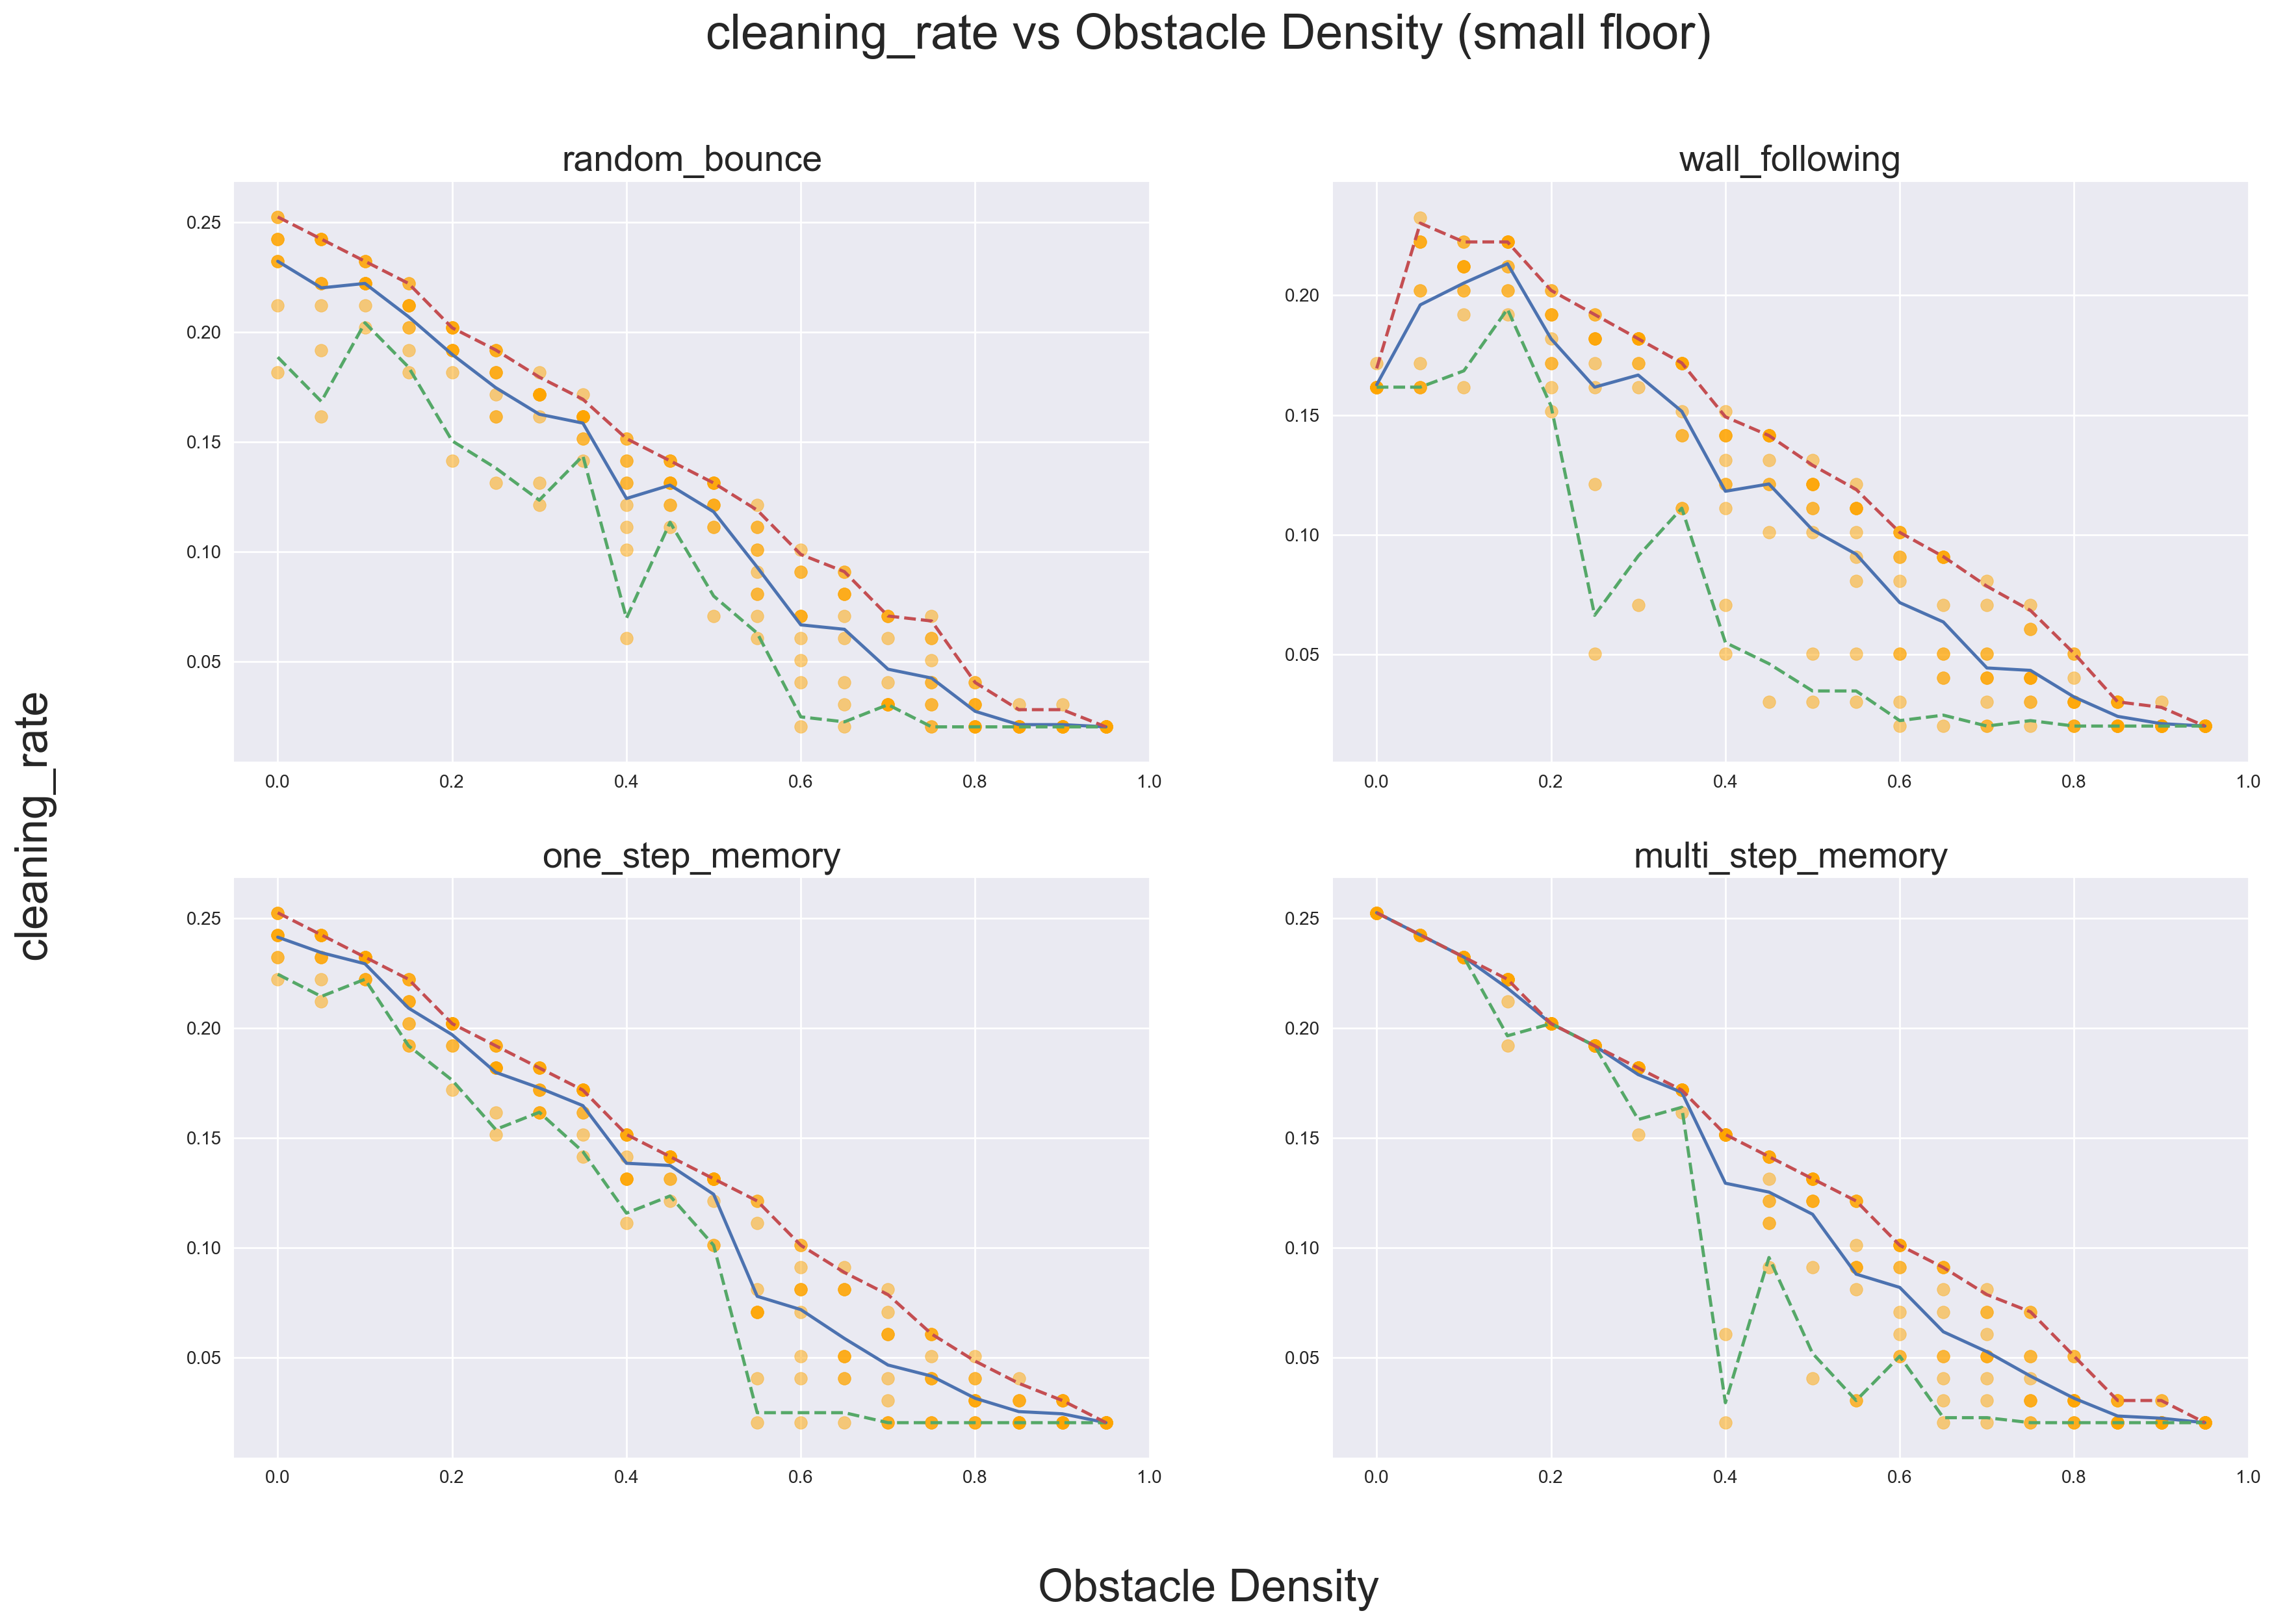

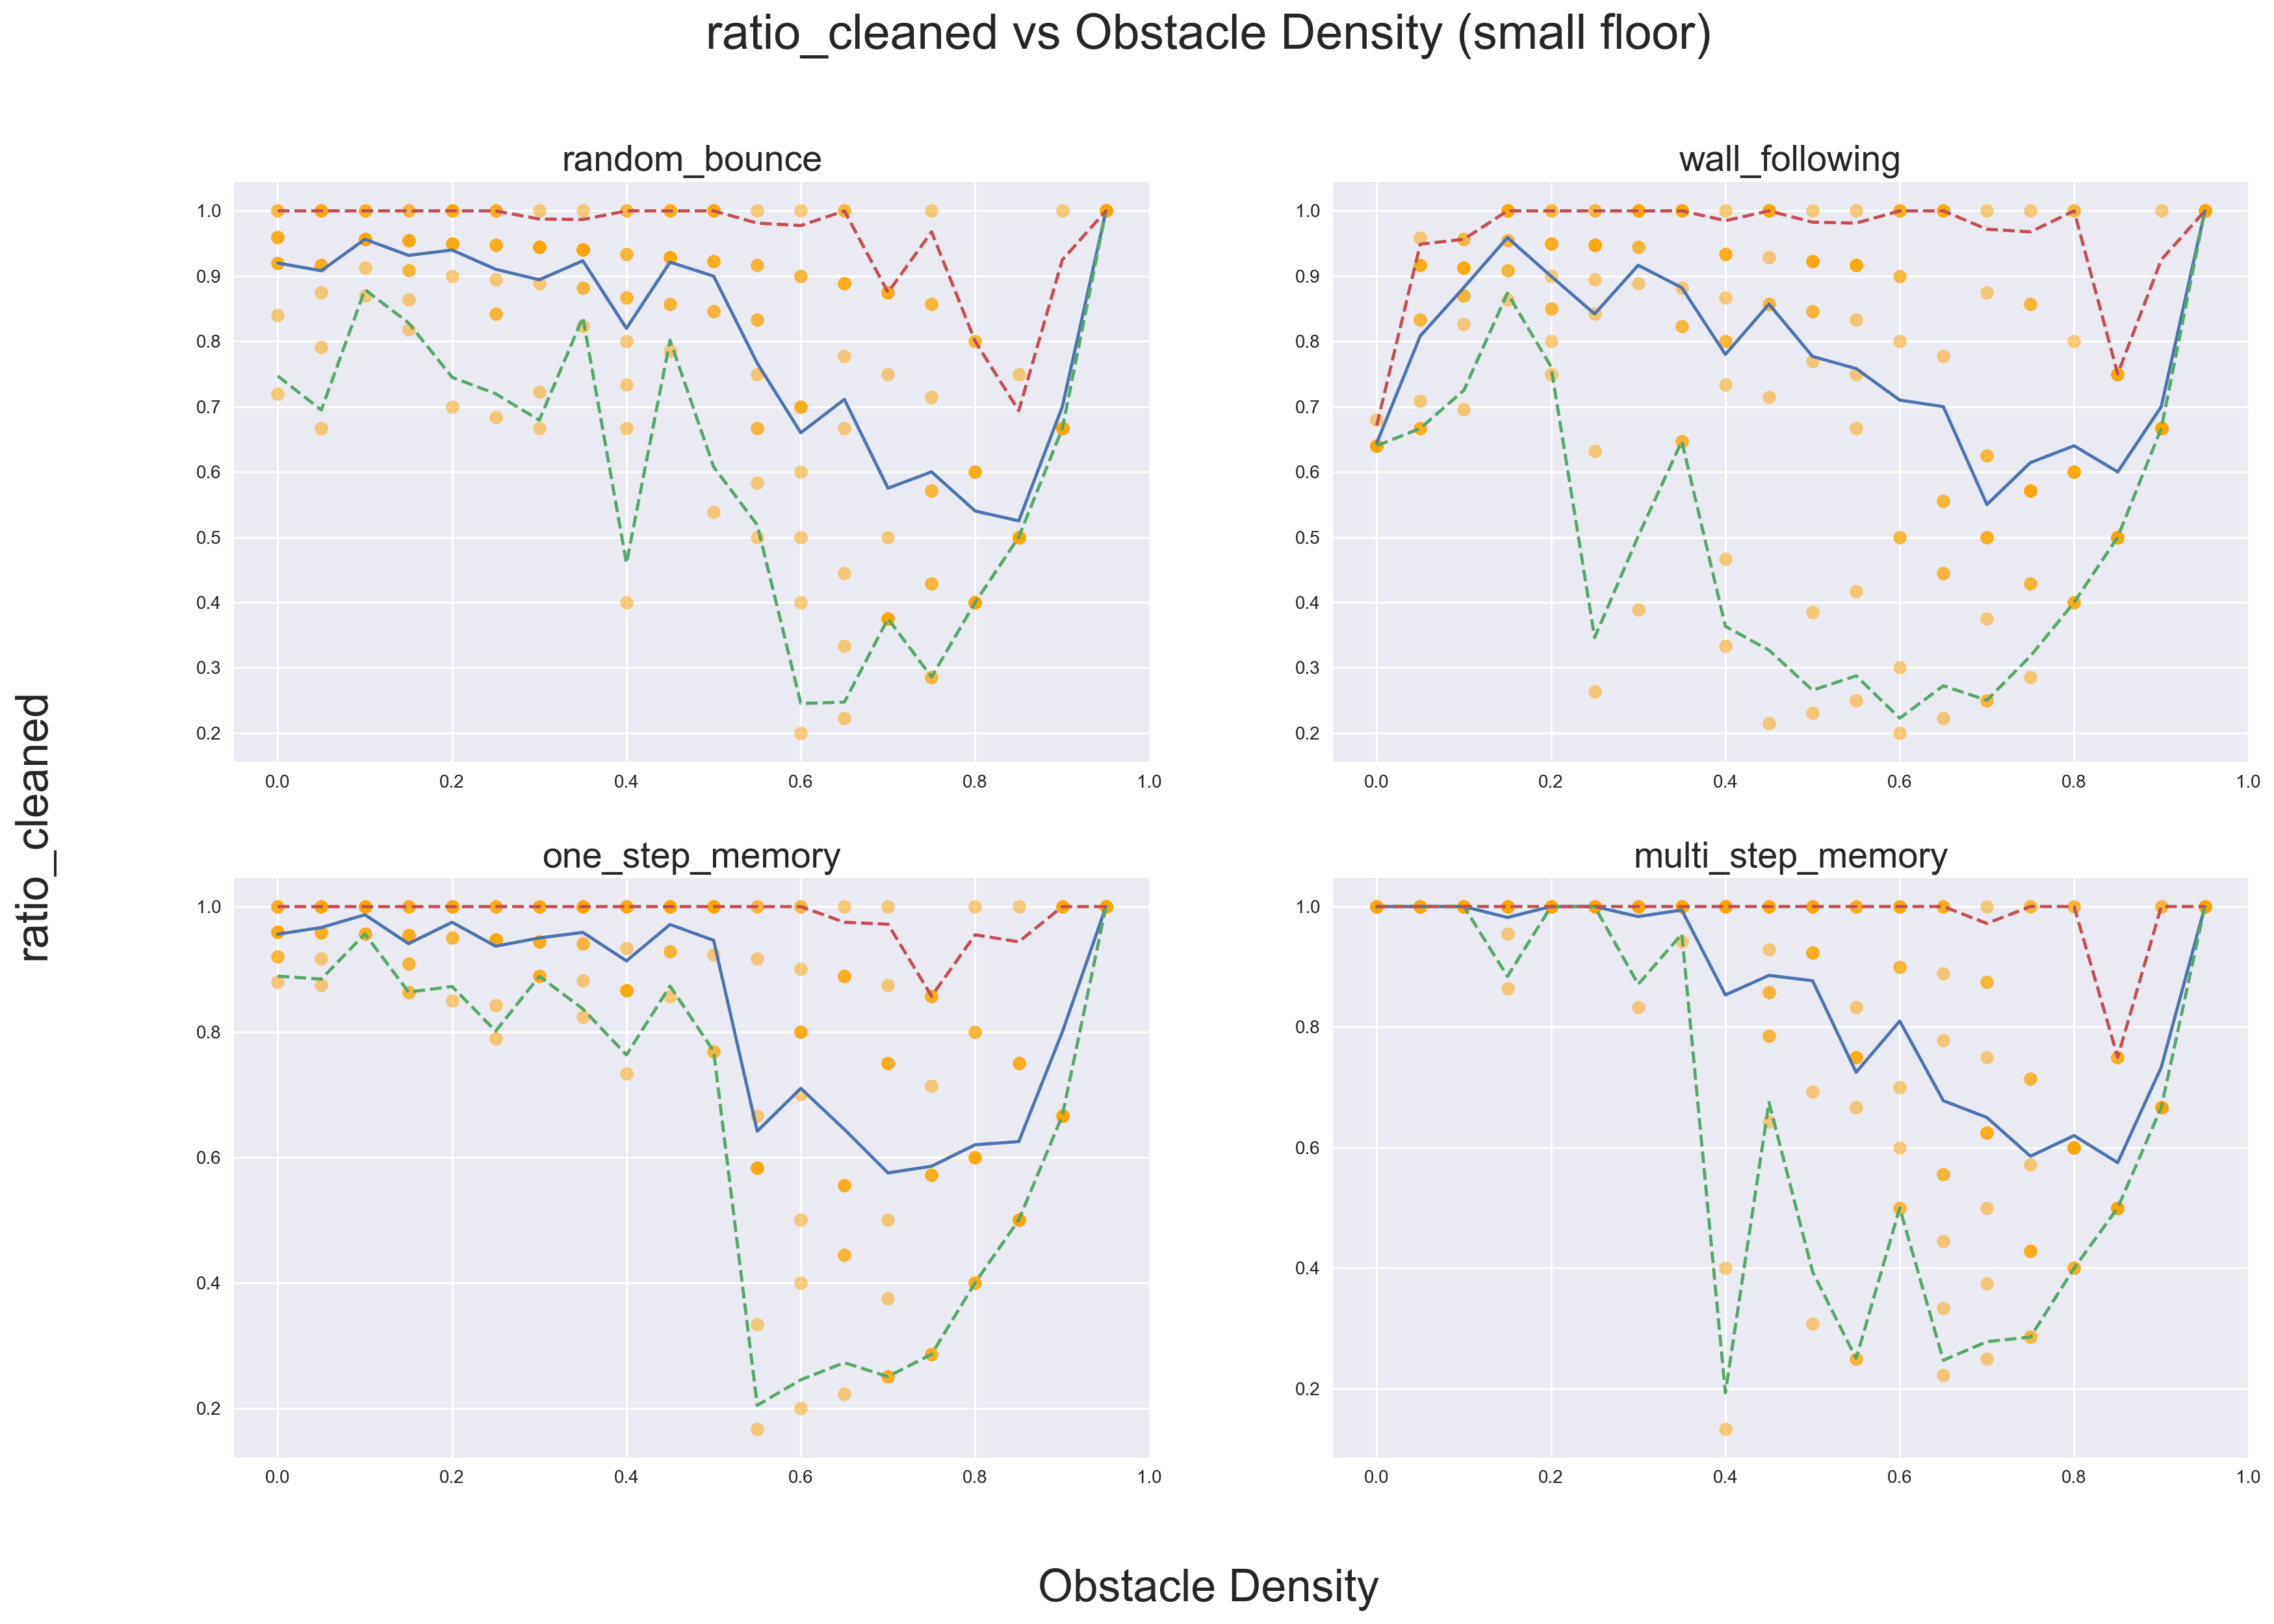

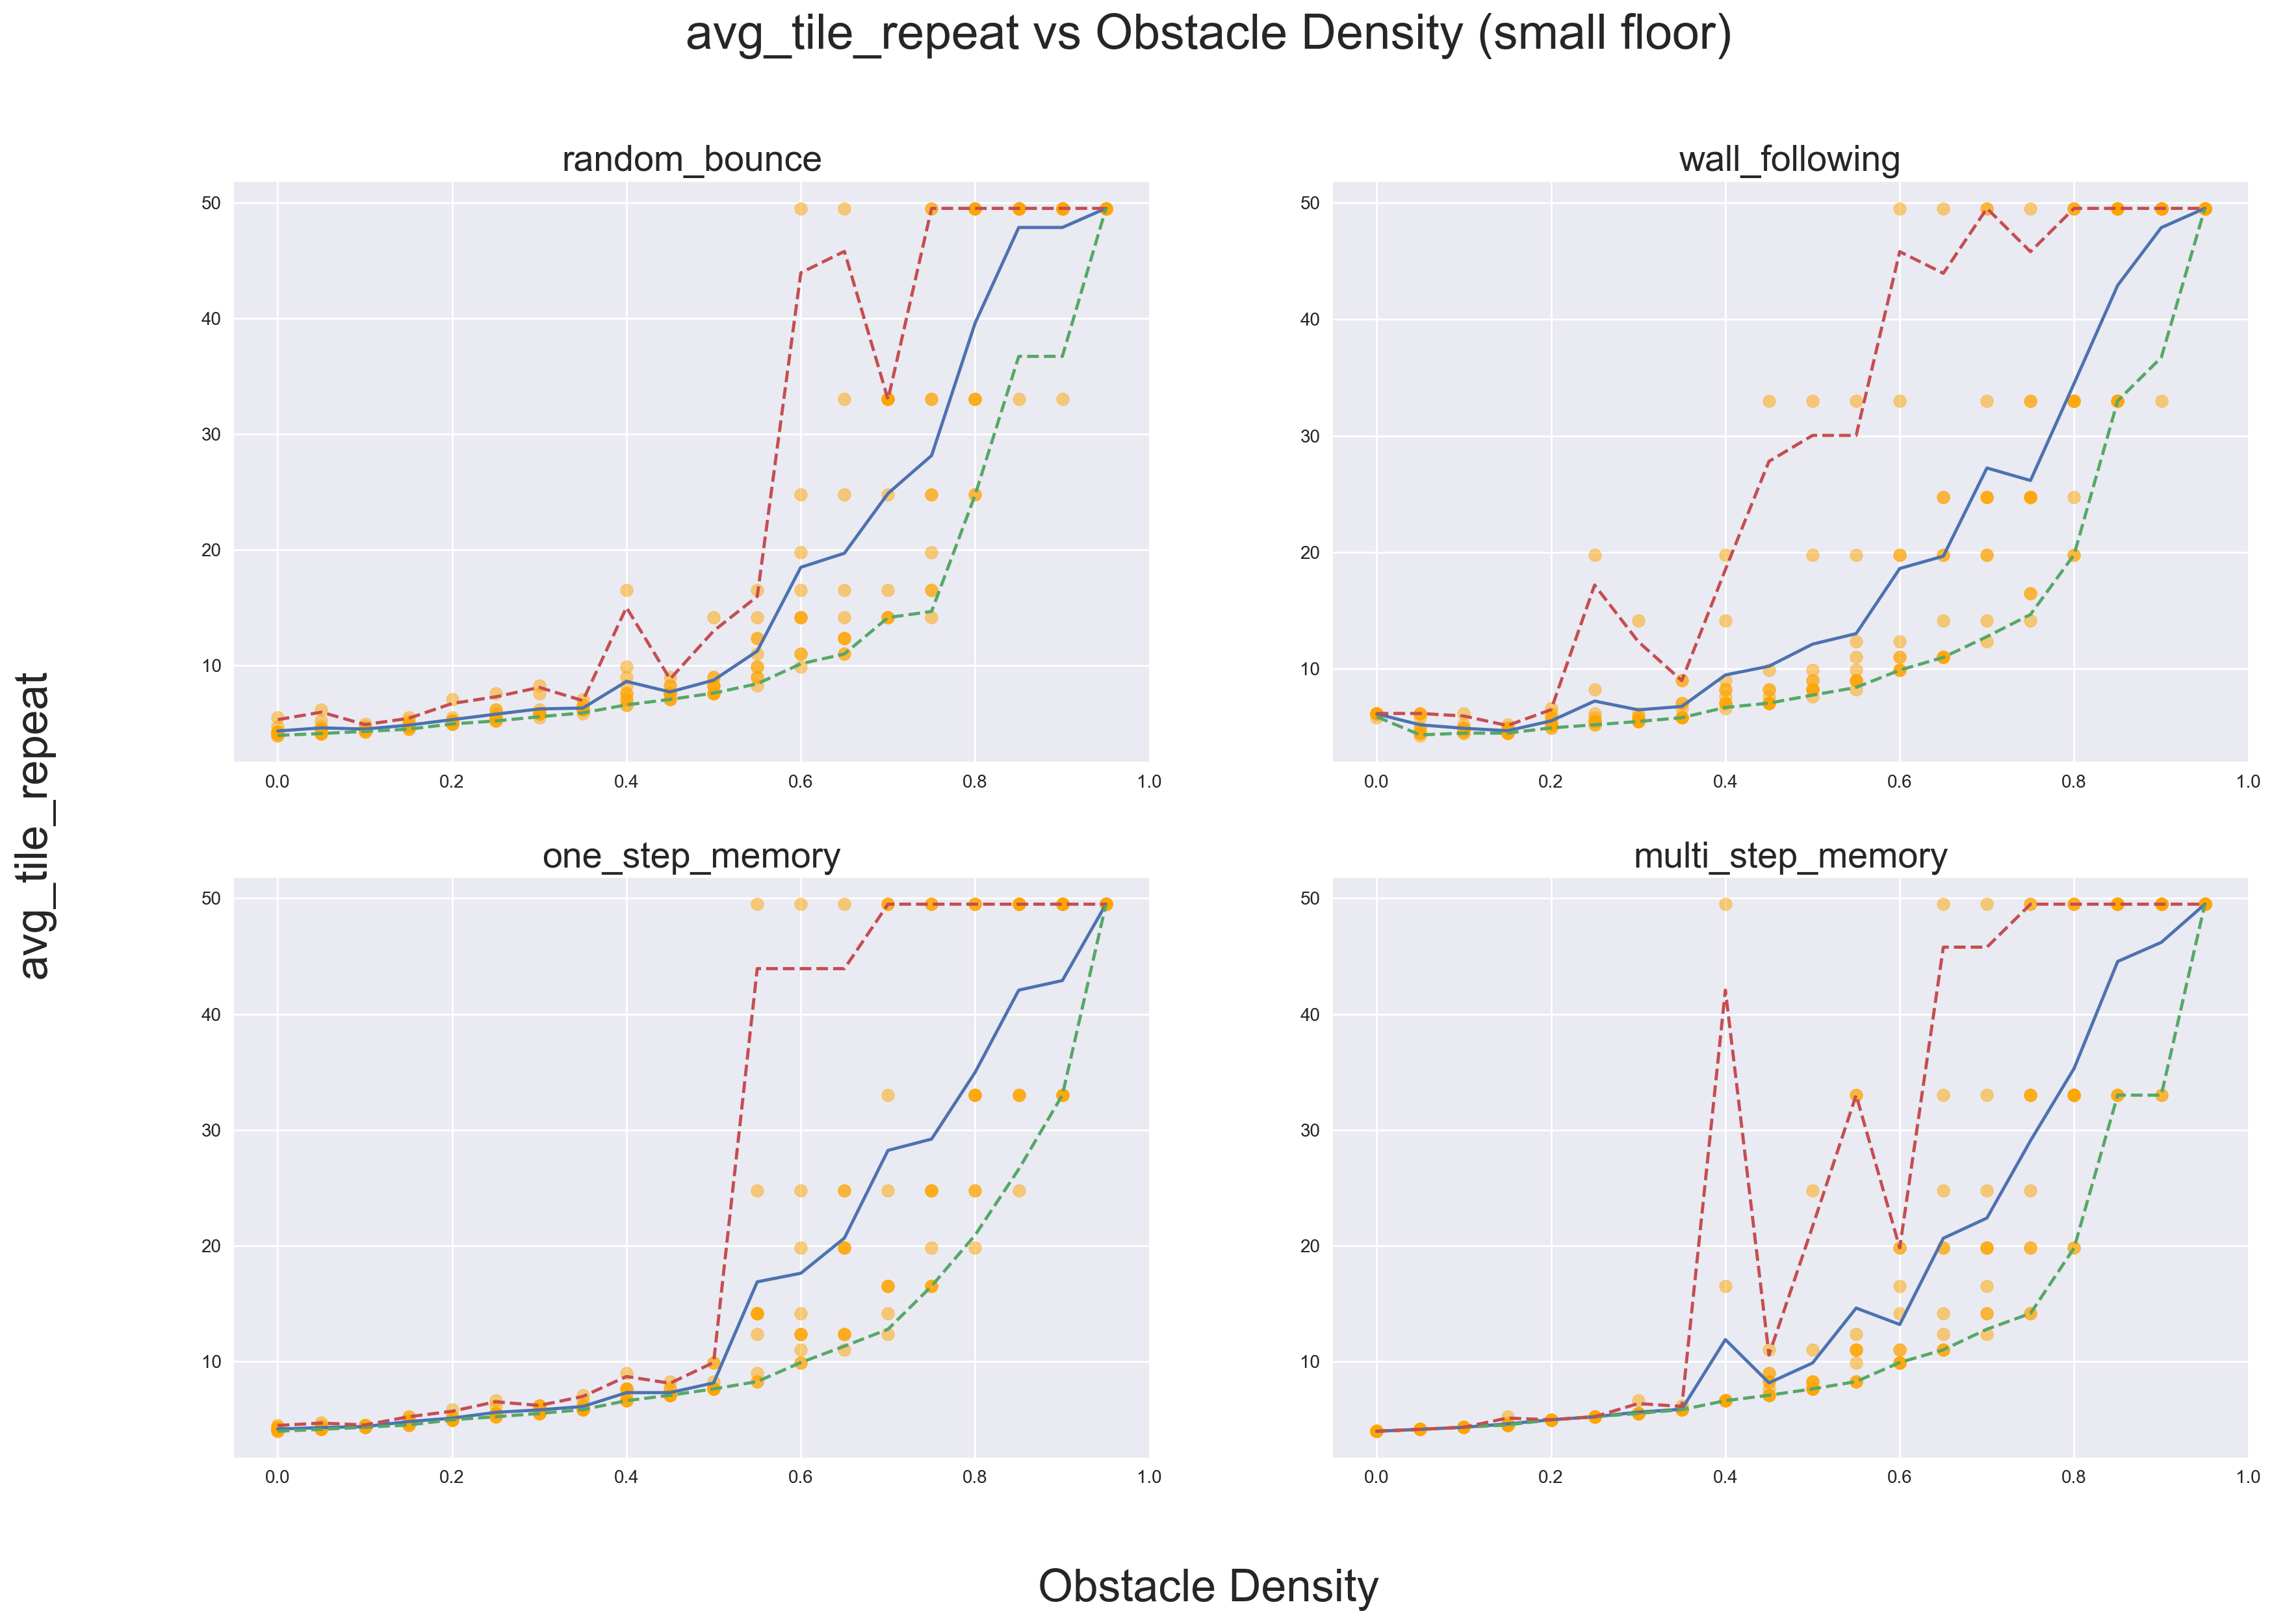

In [73]:
# different strategies and metrics
strategies = ['random_bounce', 'wall_following', 'one_step_memory', 'multi_step_memory']
metrics = ['cleaning_rate', 'ratio_cleaned', 'avg_tile_repeat']
    
for m in metrics:
    plot_results(m, 'small floor', results_df_small, mean_df_small, CI_df_small)

<h3>Small Floor Analysis</h3>

<h4>Cleaning Rate</h4>

For all strategies, we see that the mean cleaning rate is around 0.2 tiles per time-step when there are no obstacles, and this decreases to 0 tiles per time-step in a rather linear trend as the obstacle-density increases. Since the room is small (5 x 5 = 25 cells) and the number of time-steps is 100, the tiles are repeatedly cleaned which can bring down the cleaning rate (cleaning rate only considers the number of _unique_ tiles cleaned per time-step, hence as time increases, the cleaning rate decreases as the number of _unique_ tiles is fixed due to the floor size constraints). Regardless, we see that the multi-step memory strategy performs best as it has the highest mean cleaning-rate at 0 obstacle density, and the tighest confidence intervals for obstacle-density values between 0.1 - 0.4, which is the most balanced room setup and so would be most commonly found in real life. The other strategies have wider confidence intervals even at low obstacle-densities, with **insert strategy here** having the most uncertainty in its results.

<h4>Ratio Cleaned</h4>

The ratio of floor cleaned starts off high for most strategies (0.9 - 1.0), then gradually decreases when the density hits 0.4, with the lowest point around 0.6 - 0.7, and starts increasing again at a density of 0.8. This is probably because at low density, the Roomba is able to explore the floor grid easily. With more obstacles, the Roomba has a higher probability of being stuck within a certain area either because a) the obstacle layout sections of certain areas from being explored (this is undesirable but does occur due to the random obstacle distribution), or the Roomba is unable to find the exit. When the obstacle density is very high - >= 0.8 - there is less empty space to explore overall, and so as long as empty spaces aren't blocked by obstacles, the Roomba has a higher probability of cleaning it.

Once again, we see that the multi-step memory strategy performs best with the tightest confidence intervals at low obstacle density compared to the other strategies. The **insert strategy here** has the worst performance, scoring only a mean of ~0.7 even at 0 obstacle density. This is probably because the wall-following strategy causes the Roomba to cling to the walls as it cleans, avoiding the center of the room.

<h4>Average Number of Tile Repeats</h4>

For all strategies, the average number of tile repeats starts off at around 3-5 tiles per time-step at low obstacle density, and reaches a mean of 20 - 30 tiles per time-step at high obstacle density, reaching a max of 50 tiles per time-step at the highest density of 0.95. The confidence intervals start out narrow, but start to widen when the obstacle density hits 0.5, diverging to an upper CI boundary of 50 repeats per tile. The upper boundary of 50 probably occurs when the Roomba is only able to move between two tiles, and hence keeps alternating between the two tiles throughout the simulation of 100 time-steps. We see that the upper boundary, mean, and lower boundary all converge at 50 at the 0.95 mark as the Roomba is almost always stuck alternating between two tiles.

Performance-wise, multi-step memory is the strongest strategy again since it has tight confidence intervals at least until the 0.5 obstacle density point. Tight confidence intervals are desirable since given roughly similar mean results between the strategies, we would prefer the strategy that has more certainty of delivering that result, so that there is less probability of underperforming.

<h4>Summary</h4>

The multi-step memory strategy appears to be the best-performing strategy. Even when the mean value does not differ too much between strategies, the multi-step memory strategy constantly has the tightest confidence intervals, which in this case is good given that wider confidence intervals of the other strategies are inclined towards the "underperforming" direction vs the "overperforming" direction. For example, the confidence intervals of the ratio of floor cleaned values tend to have a wider lower boundaries vs wider upper boundaries, which indicate that the strategies have a higher probability of having _low ratio of floor cleaned_ vs having a _high ratio of floor cleaned_. By having tight confidence intervals, the multi-step memory strategy is superior since it limits the probability of underperforming.

In [ ]:
for m in metrics:
    plot_results(m, 'medium floor', results_df_med, mean_df_med, CI_df_med)

<h3>Medium Floor Analysis</h3>

The medium floor results are roughly similar to the small floor results, and so a less detailed analysis will be carried out; particularly significant insights will be pointed out.

<h4>Cleaning Rate</h4>

For all strategies, we see that the mean cleaning rate is around 0.2 tiles per time-step when there are no obstacles, and this decreases to 0 tiles per time-step in a rather linear trend as the obstacle-density increases. Since the room is small (5 x 5 = 25 cells) and the number of time-steps is 100, the tiles are repeatedly cleaned which can bring down the cleaning rate (cleaning rate only considers the number of _unique_ tiles cleaned per time-step, hence as time increases, the cleaning rate decreases as the number of _unique_ tiles is fixed due to the floor size constraints). Regardless, we see that the multi-step memory strategy performs best as it has the highest mean cleaning-rate at 0 obstacle density, and the tighest confidence intervals for obstacle-density values between 0.1 - 0.4, which is the most balanced room setup and so would be most commonly found in real life. The other strategies have wider confidence intervals even at low obstacle-densities, with **insert strategy here** having the most uncertainty in its results.

<h4>Ratio Cleaned</h4>

The ratio of floor cleaned starts off high for most strategies (0.9 - 1.0), then gradually decreases when the density hits 0.4, with the lowest point around 0.6 - 0.7, and starts increasing again at a density of 0.8. This is probably because at low density, the Roomba is able to explore the floor grid easily. With more obstacles, the Roomba has a higher probability of being stuck within a certain area either because a) the obstacle layout sections of certain areas from being explored (this is undesirable but does occur due to the random obstacle distribution), or the Roomba is unable to find the exit. When the obstacle density is very high - >= 0.8 - there is less empty space to explore overall, and so as long as empty spaces aren't blocked by obstacles, the Roomba has a higher probability of cleaning it.

Once again, we see that the multi-step memory strategy performs best with the tightest confidence intervals at low obstacle density compared to the other strategies. The **insert strategy here** has the worst performance, scoring only a mean of ~0.7 even at 0 obstacle density. This is probably because the wall-following strategy causes the Roomba to cling to the walls as it cleans, avoiding the center of the room.

<h4>Average Number of Tile Repeats</h4>

For all strategies, the average number of tile repeats starts off at around 3-5 tiles per time-step at low obstacle density, and reaches a mean of 20 - 30 tiles per time-step at high obstacle density, reaching a max of 50 tiles per time-step at the highest density of 0.95. The confidence intervals start out narrow, but start to widen when the obstacle density hits 0.5, diverging to an upper CI boundary of 50 repeats per tile. The upper boundary of 50 probably occurs when the Roomba is only able to move between two tiles, and hence keeps alternating between the two tiles throughout the simulation of 100 time-steps. We see that the upper boundary, mean, and lower boundary all converge at 50 at the 0.95 mark as the Roomba is almost always stuck alternating between two tiles.

Performance-wise, multi-step memory is the strongest strategy again since it has tight confidence intervals at least until the 0.5 obstacle density point. Tight confidence intervals are desirable since given roughly similar mean results between the strategies, we would prefer the strategy that has more certainty of delivering that result, so that there is less probability of underperforming.

<h4>Summary</h4>

The multi-step memory strategy appears to be the best-performing strategy. Even when the mean value does not differ too much between strategies, the multi-step memory strategy constantly has the tightest confidence intervals, which in this case is good given that wider confidence intervals of the other strategies are inclined towards the "underperforming" direction vs the "overperforming" direction. For example, the confidence intervals of the ratio of floor cleaned values tend to have a wider lower boundaries vs wider upper boundaries, which indicate that the strategies have a higher probability of having _low ratio of floor cleaned_ vs having a _high ratio of floor cleaned_. By having tight confidence intervals, the multi-step memory strategy is superior since it limits the probability of underperforming.

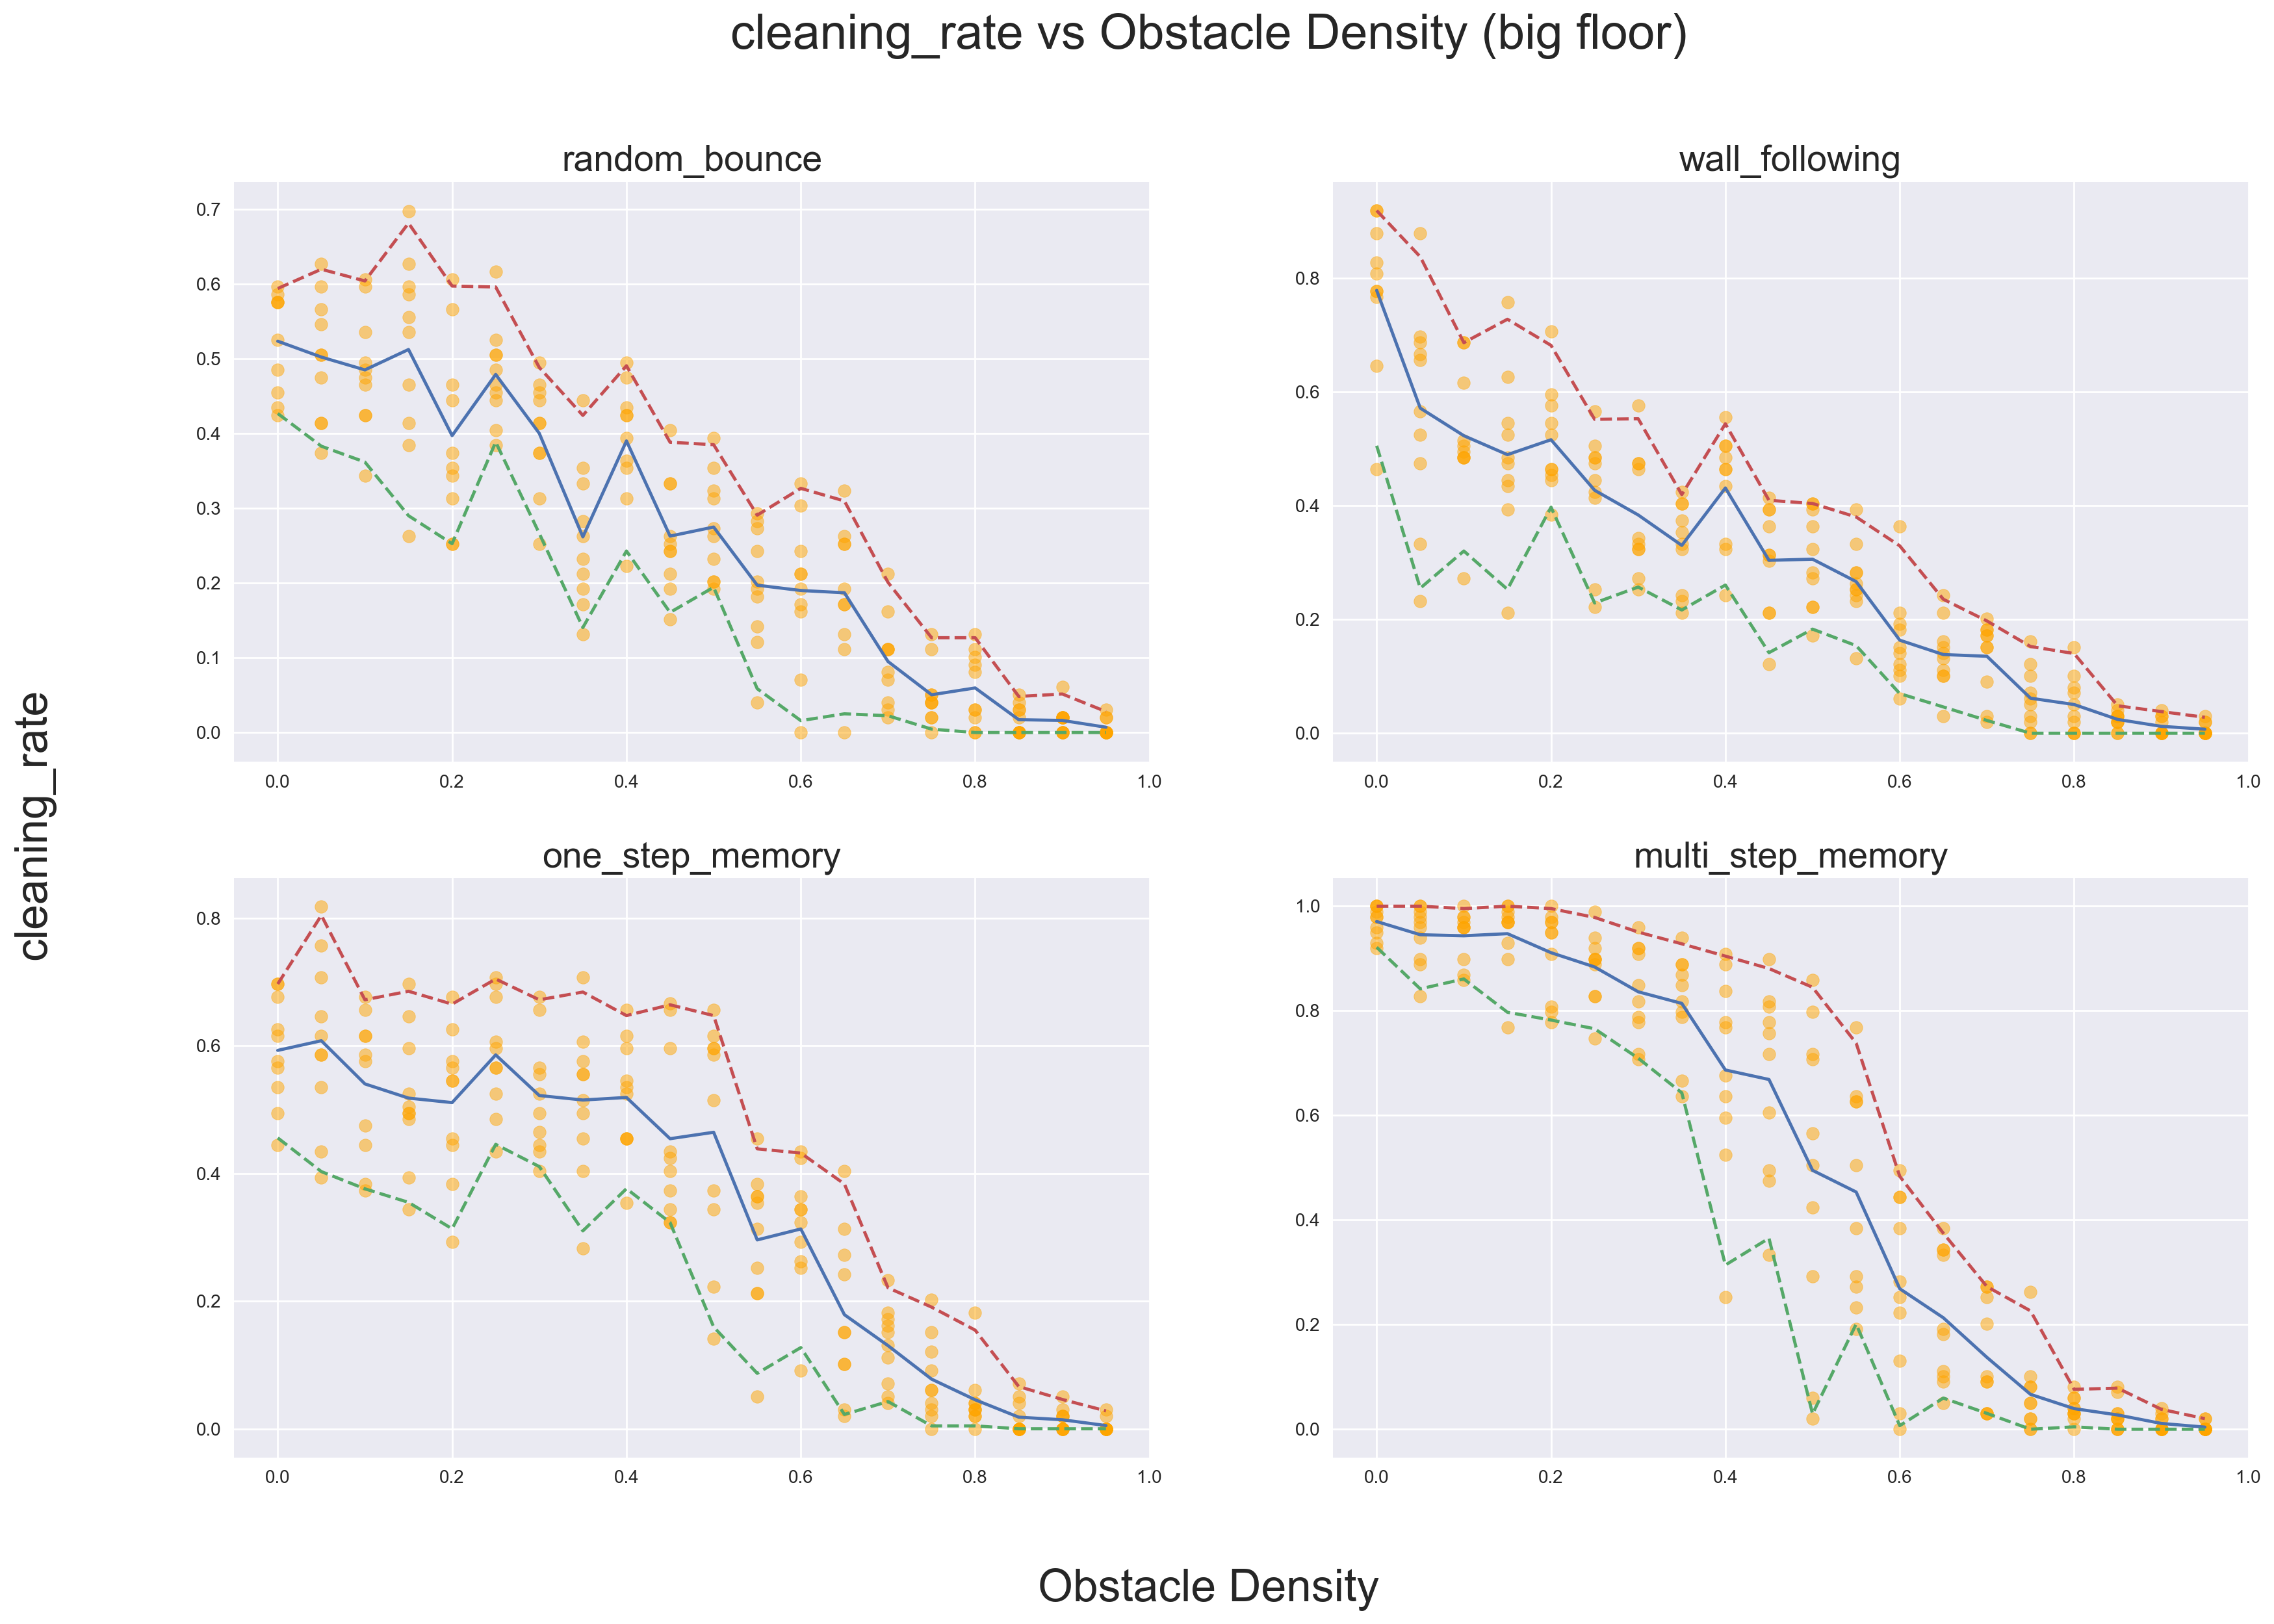

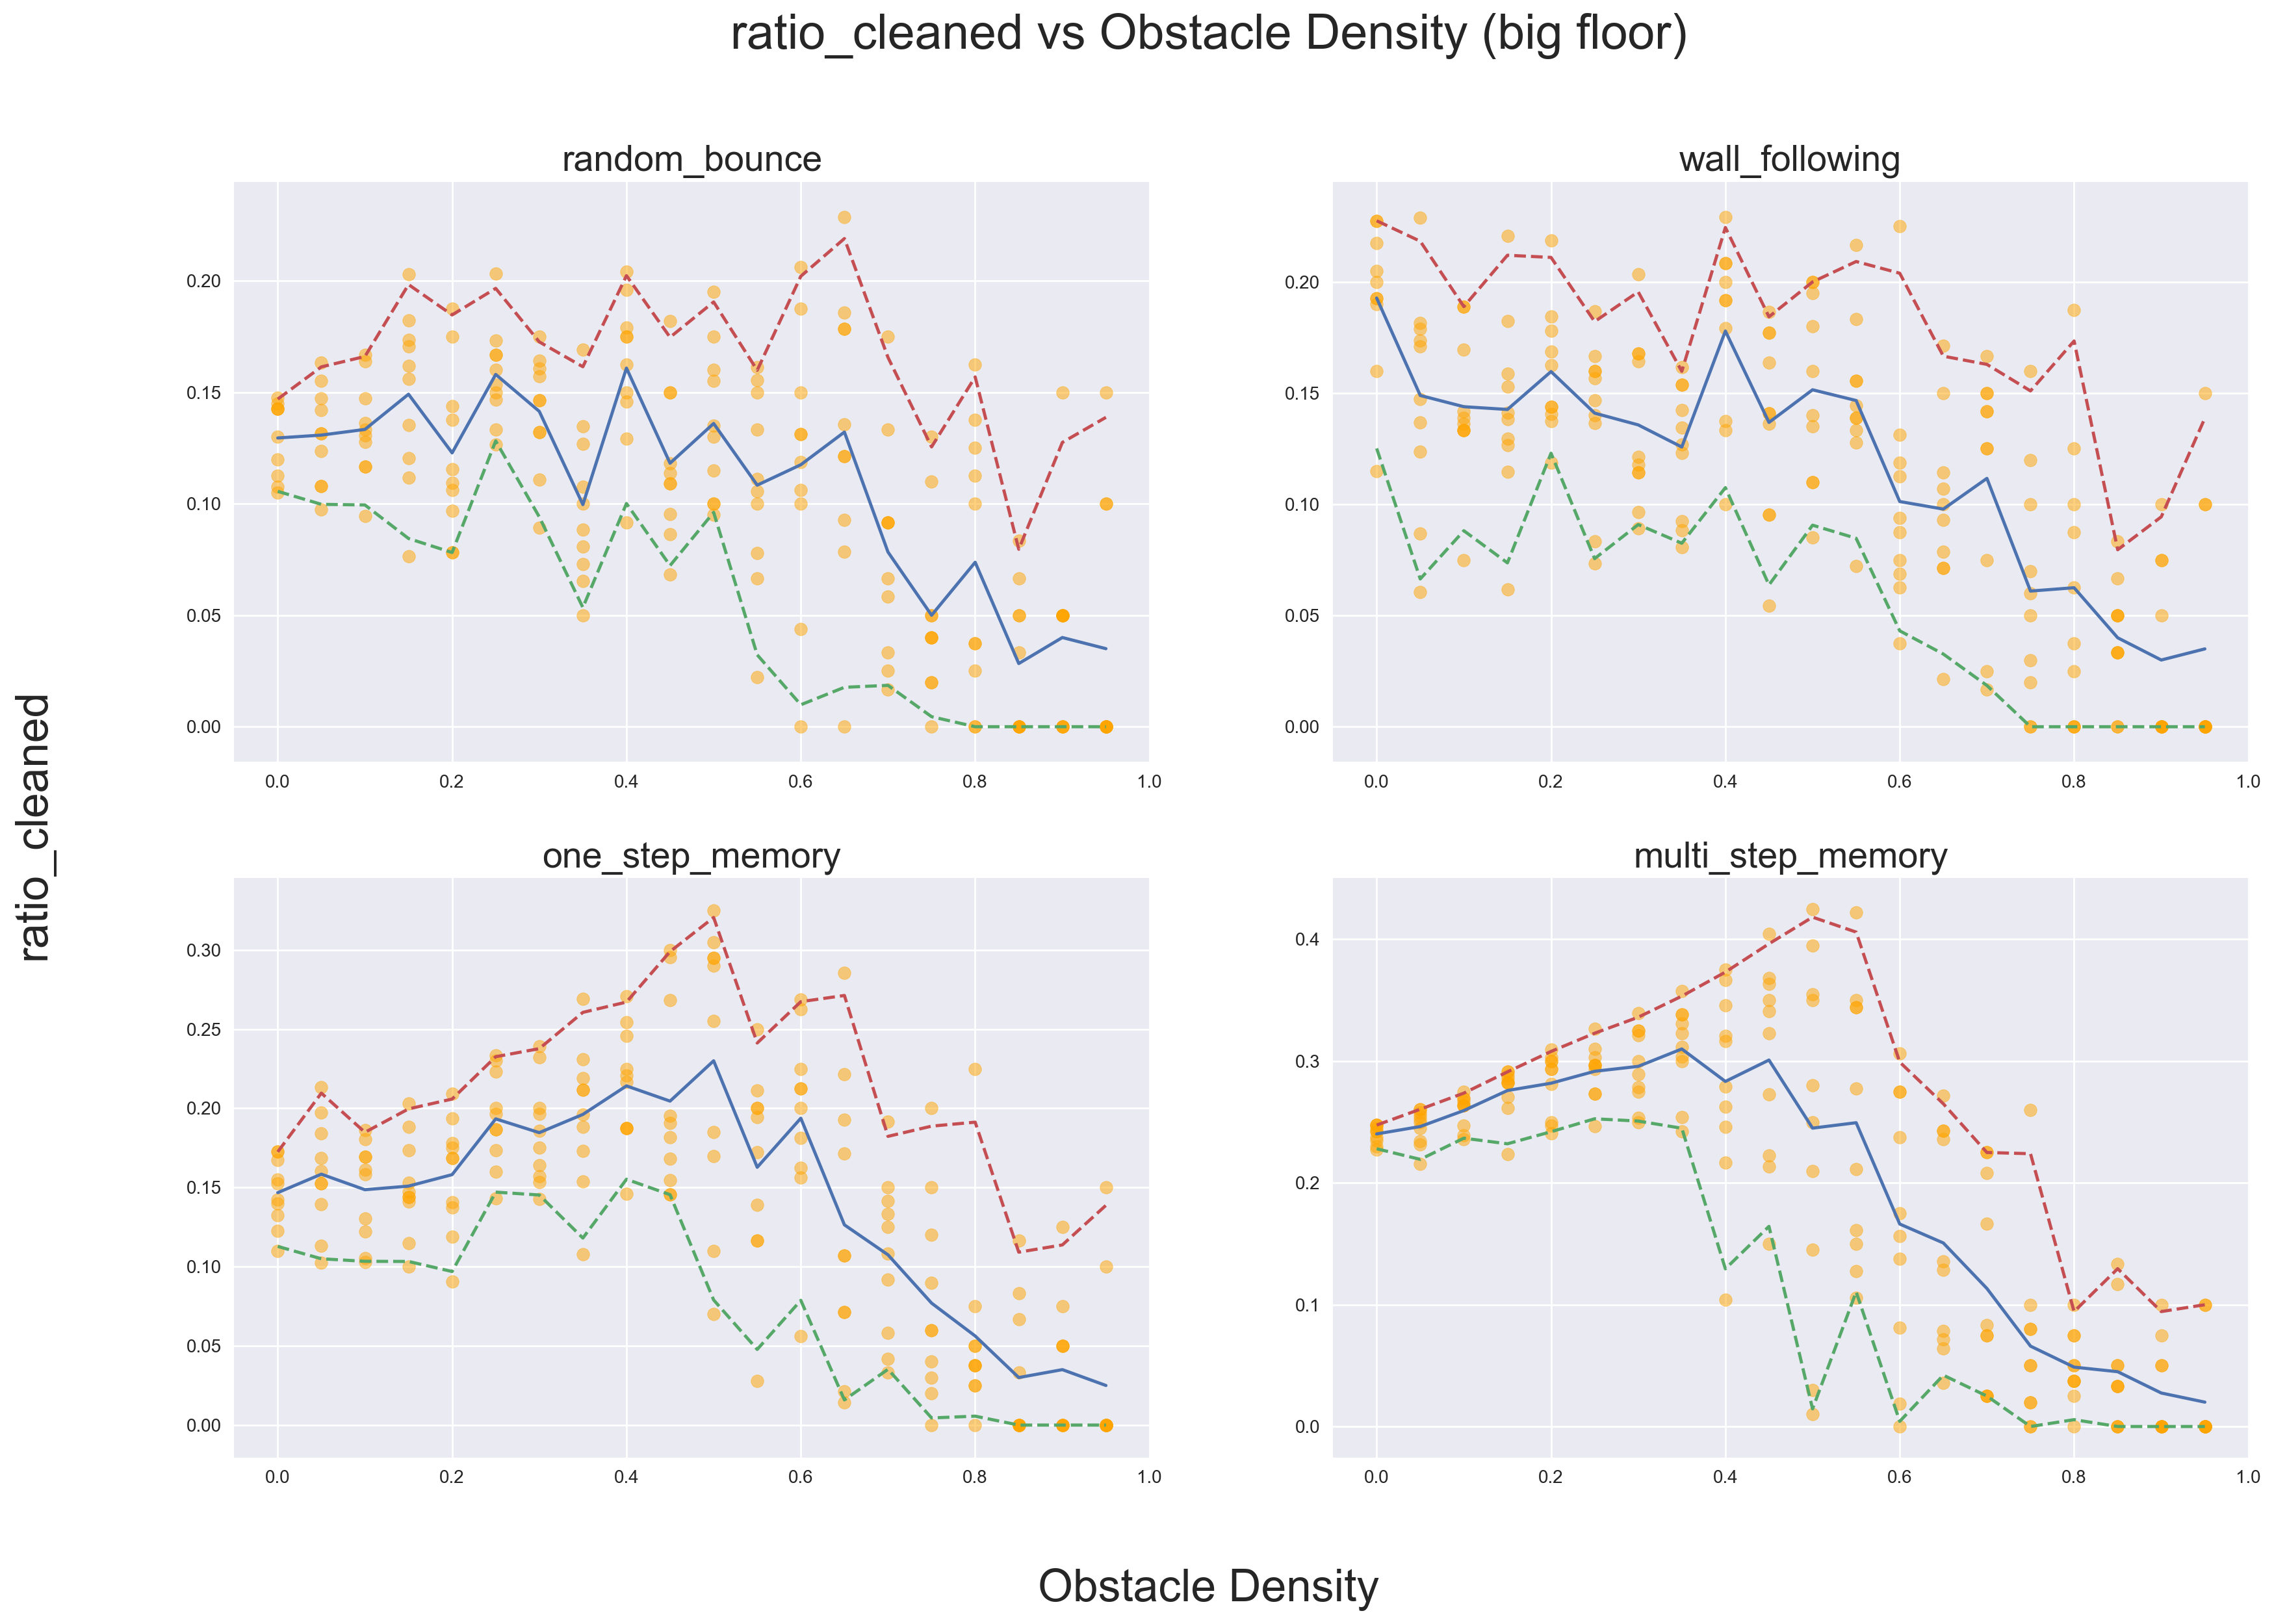

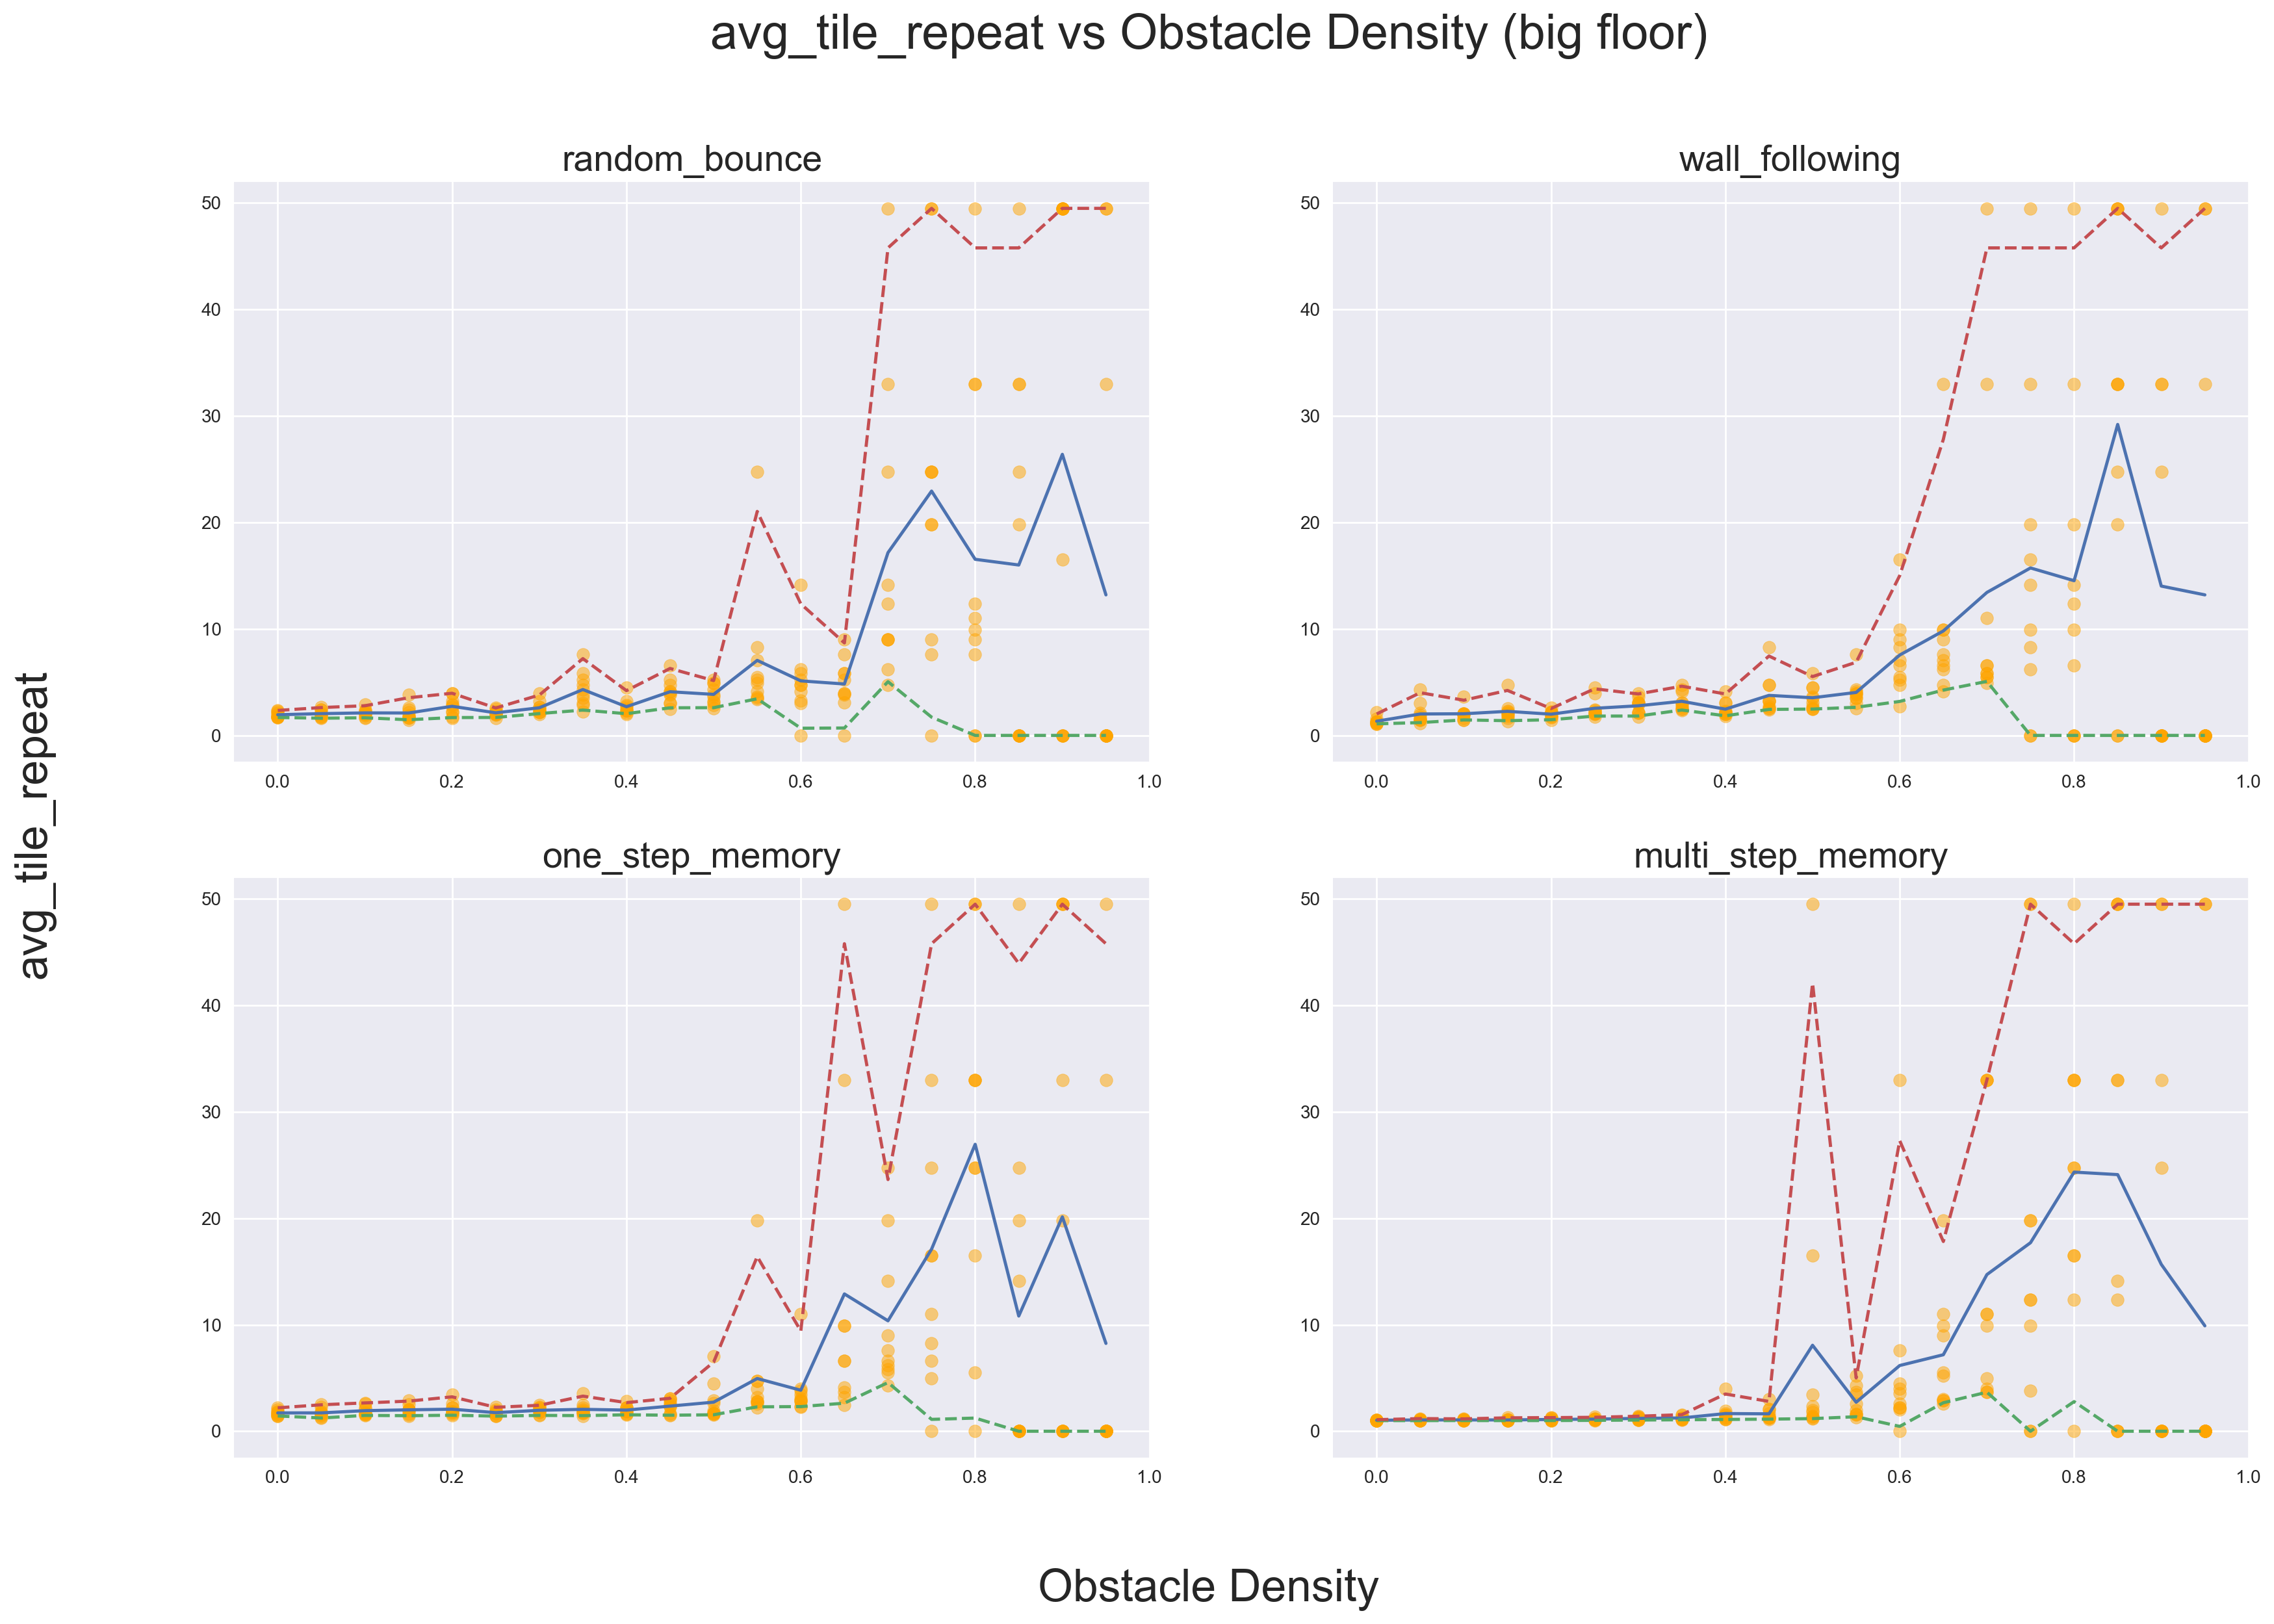

In [41]:
for m in metrics:
    plot_results(m, 'big floor', results_df_big, mean_df_big, CI_df_big)

In [16]:
def plot_subset_histograms(df):
    
    df_subset = df.loc[np.where(df['densities'] <= 0.5)]
    
    fig, ax = plt.subplots(4, 3, figsize=(25, 27), dpi=200,
                    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for s in range(len(strategies)):
        ax[s,0].set_ylabel(strategies[s], size=25)
        
        for m in range(len(metrics)):
            ax[0,m].set_title(metrics[m], size=25)
            ax[s,m].hist(df_subset[strategies[s] + '_' + metrics[m]], bins=25)
            lower, upper = np.percentile(df_subset[strategies[s] + '_' + metrics[m]], [2.5,97.5])
            ax[s,m].axvline(lower, color='coral')
            ax[s,m].axvline(upper, color='coral')
    

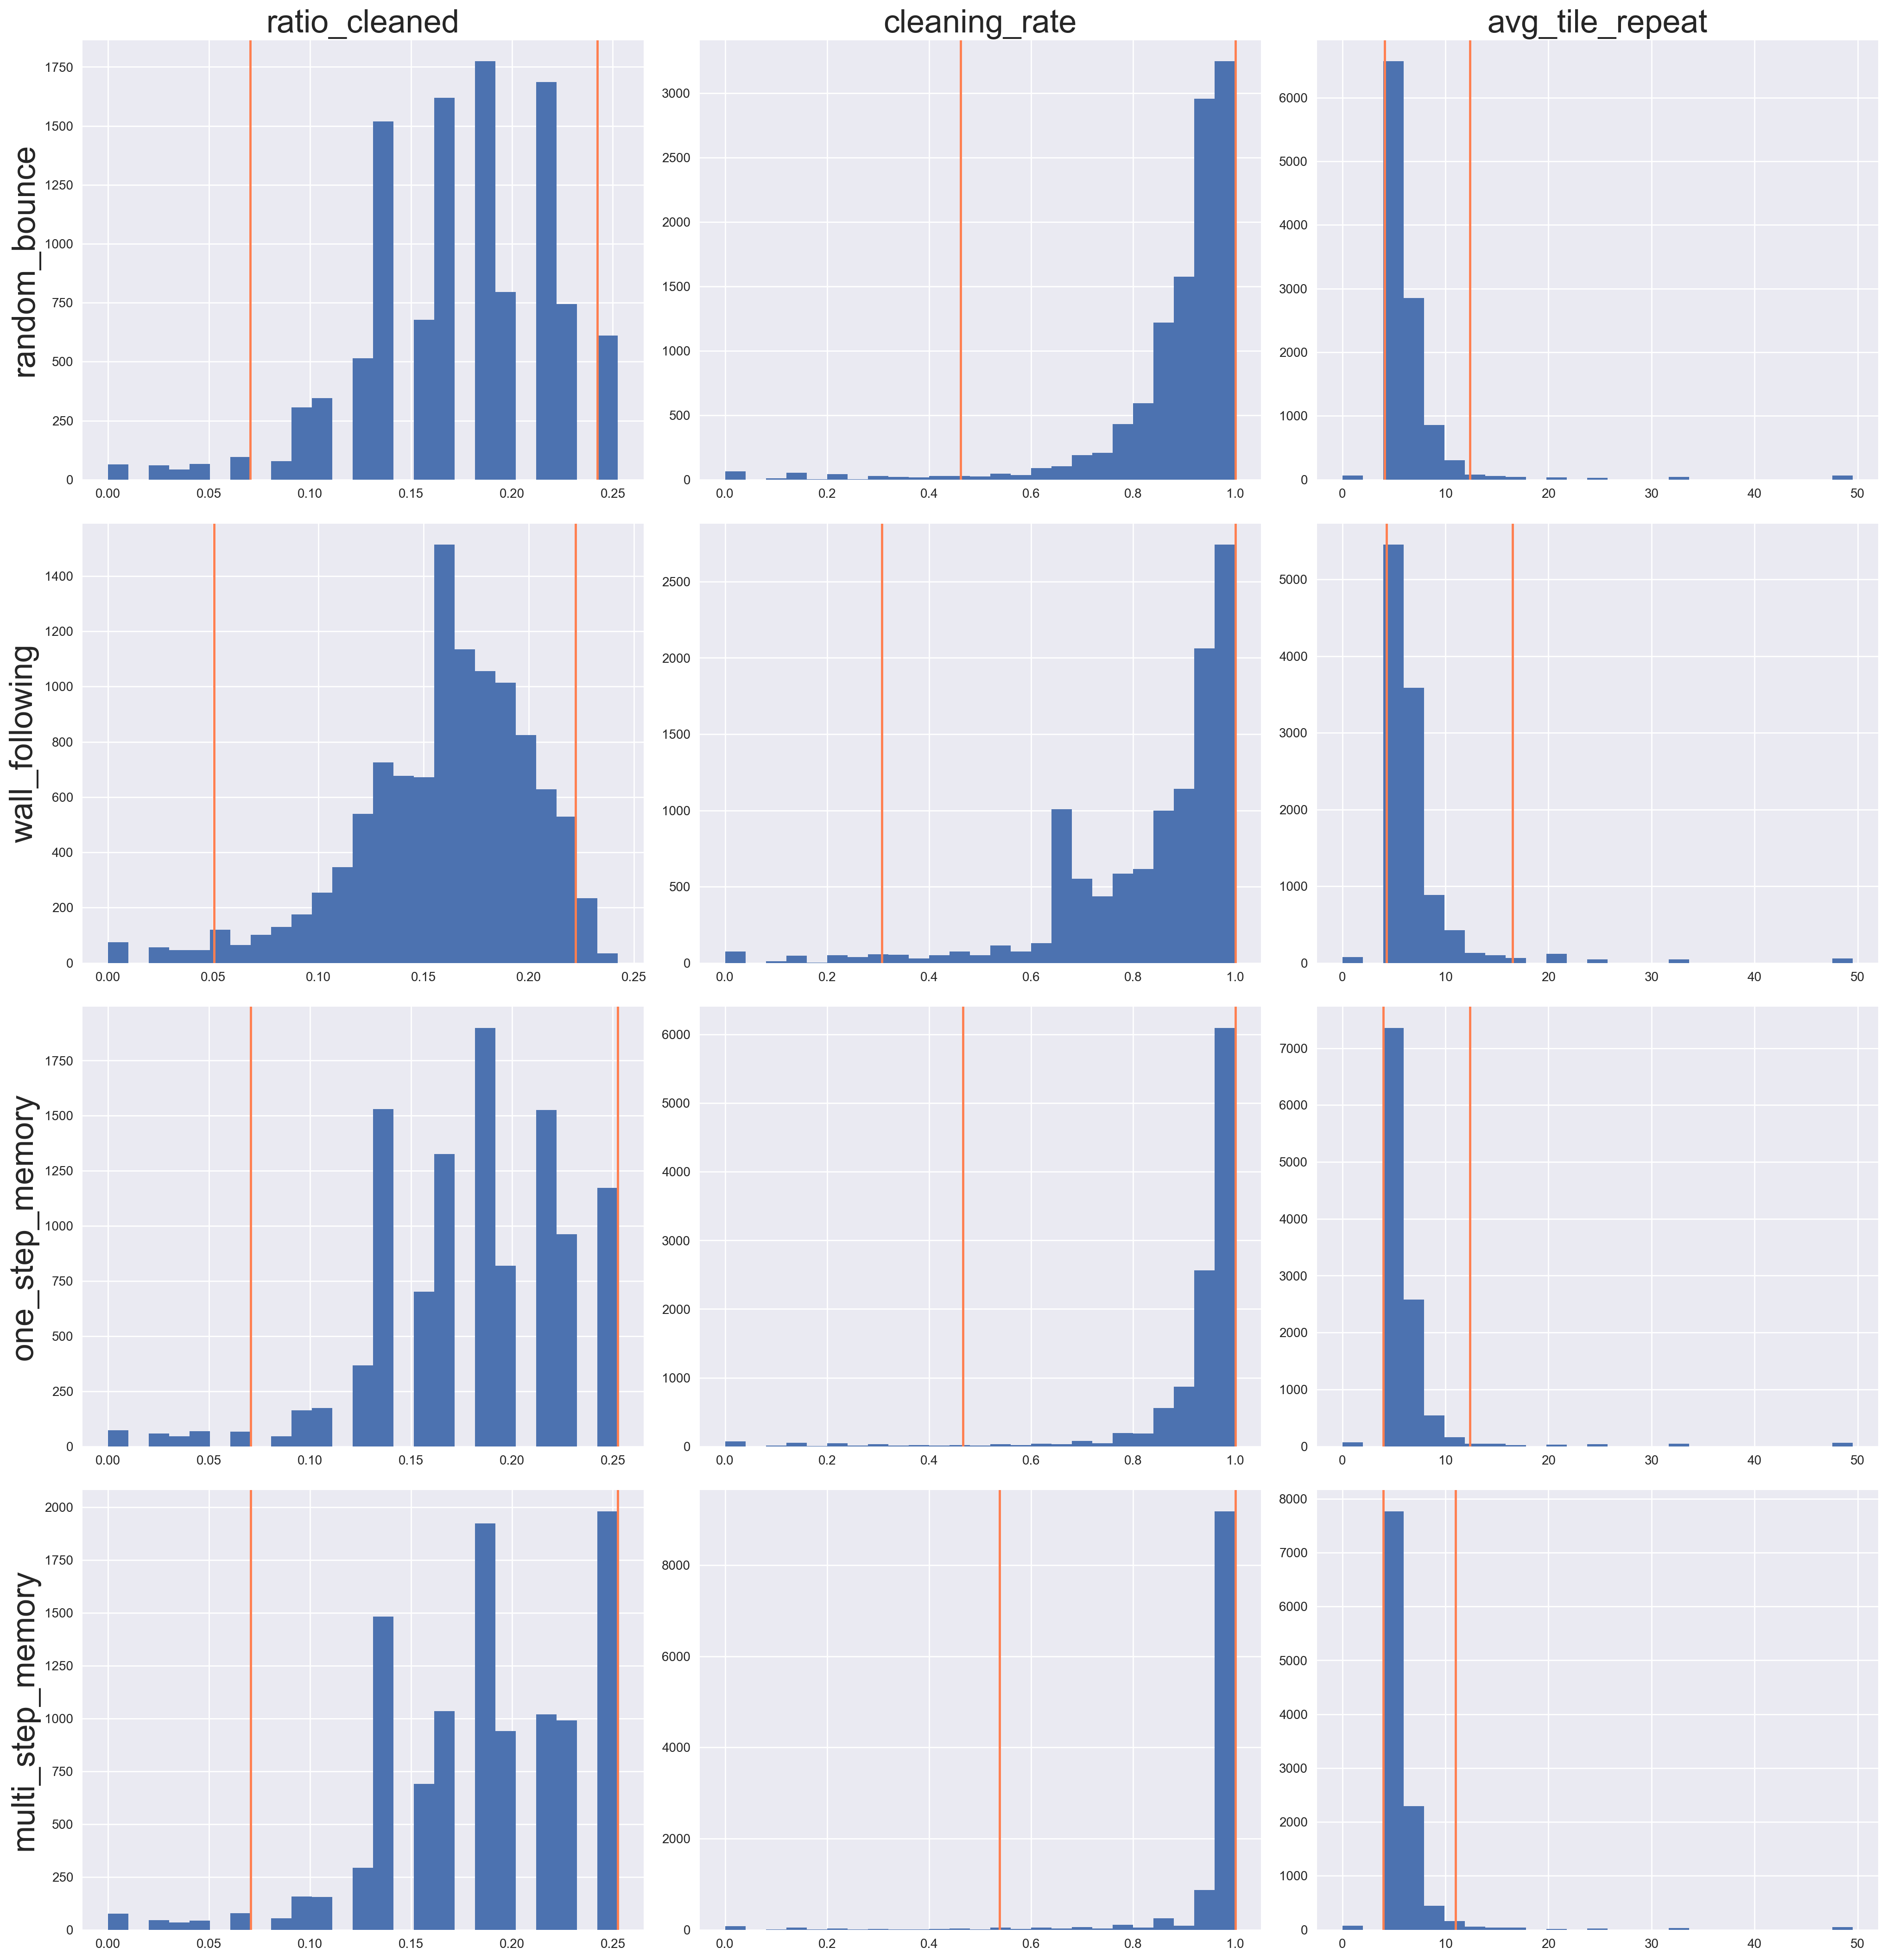

In [17]:
plot_subset_histograms(results_df_small)


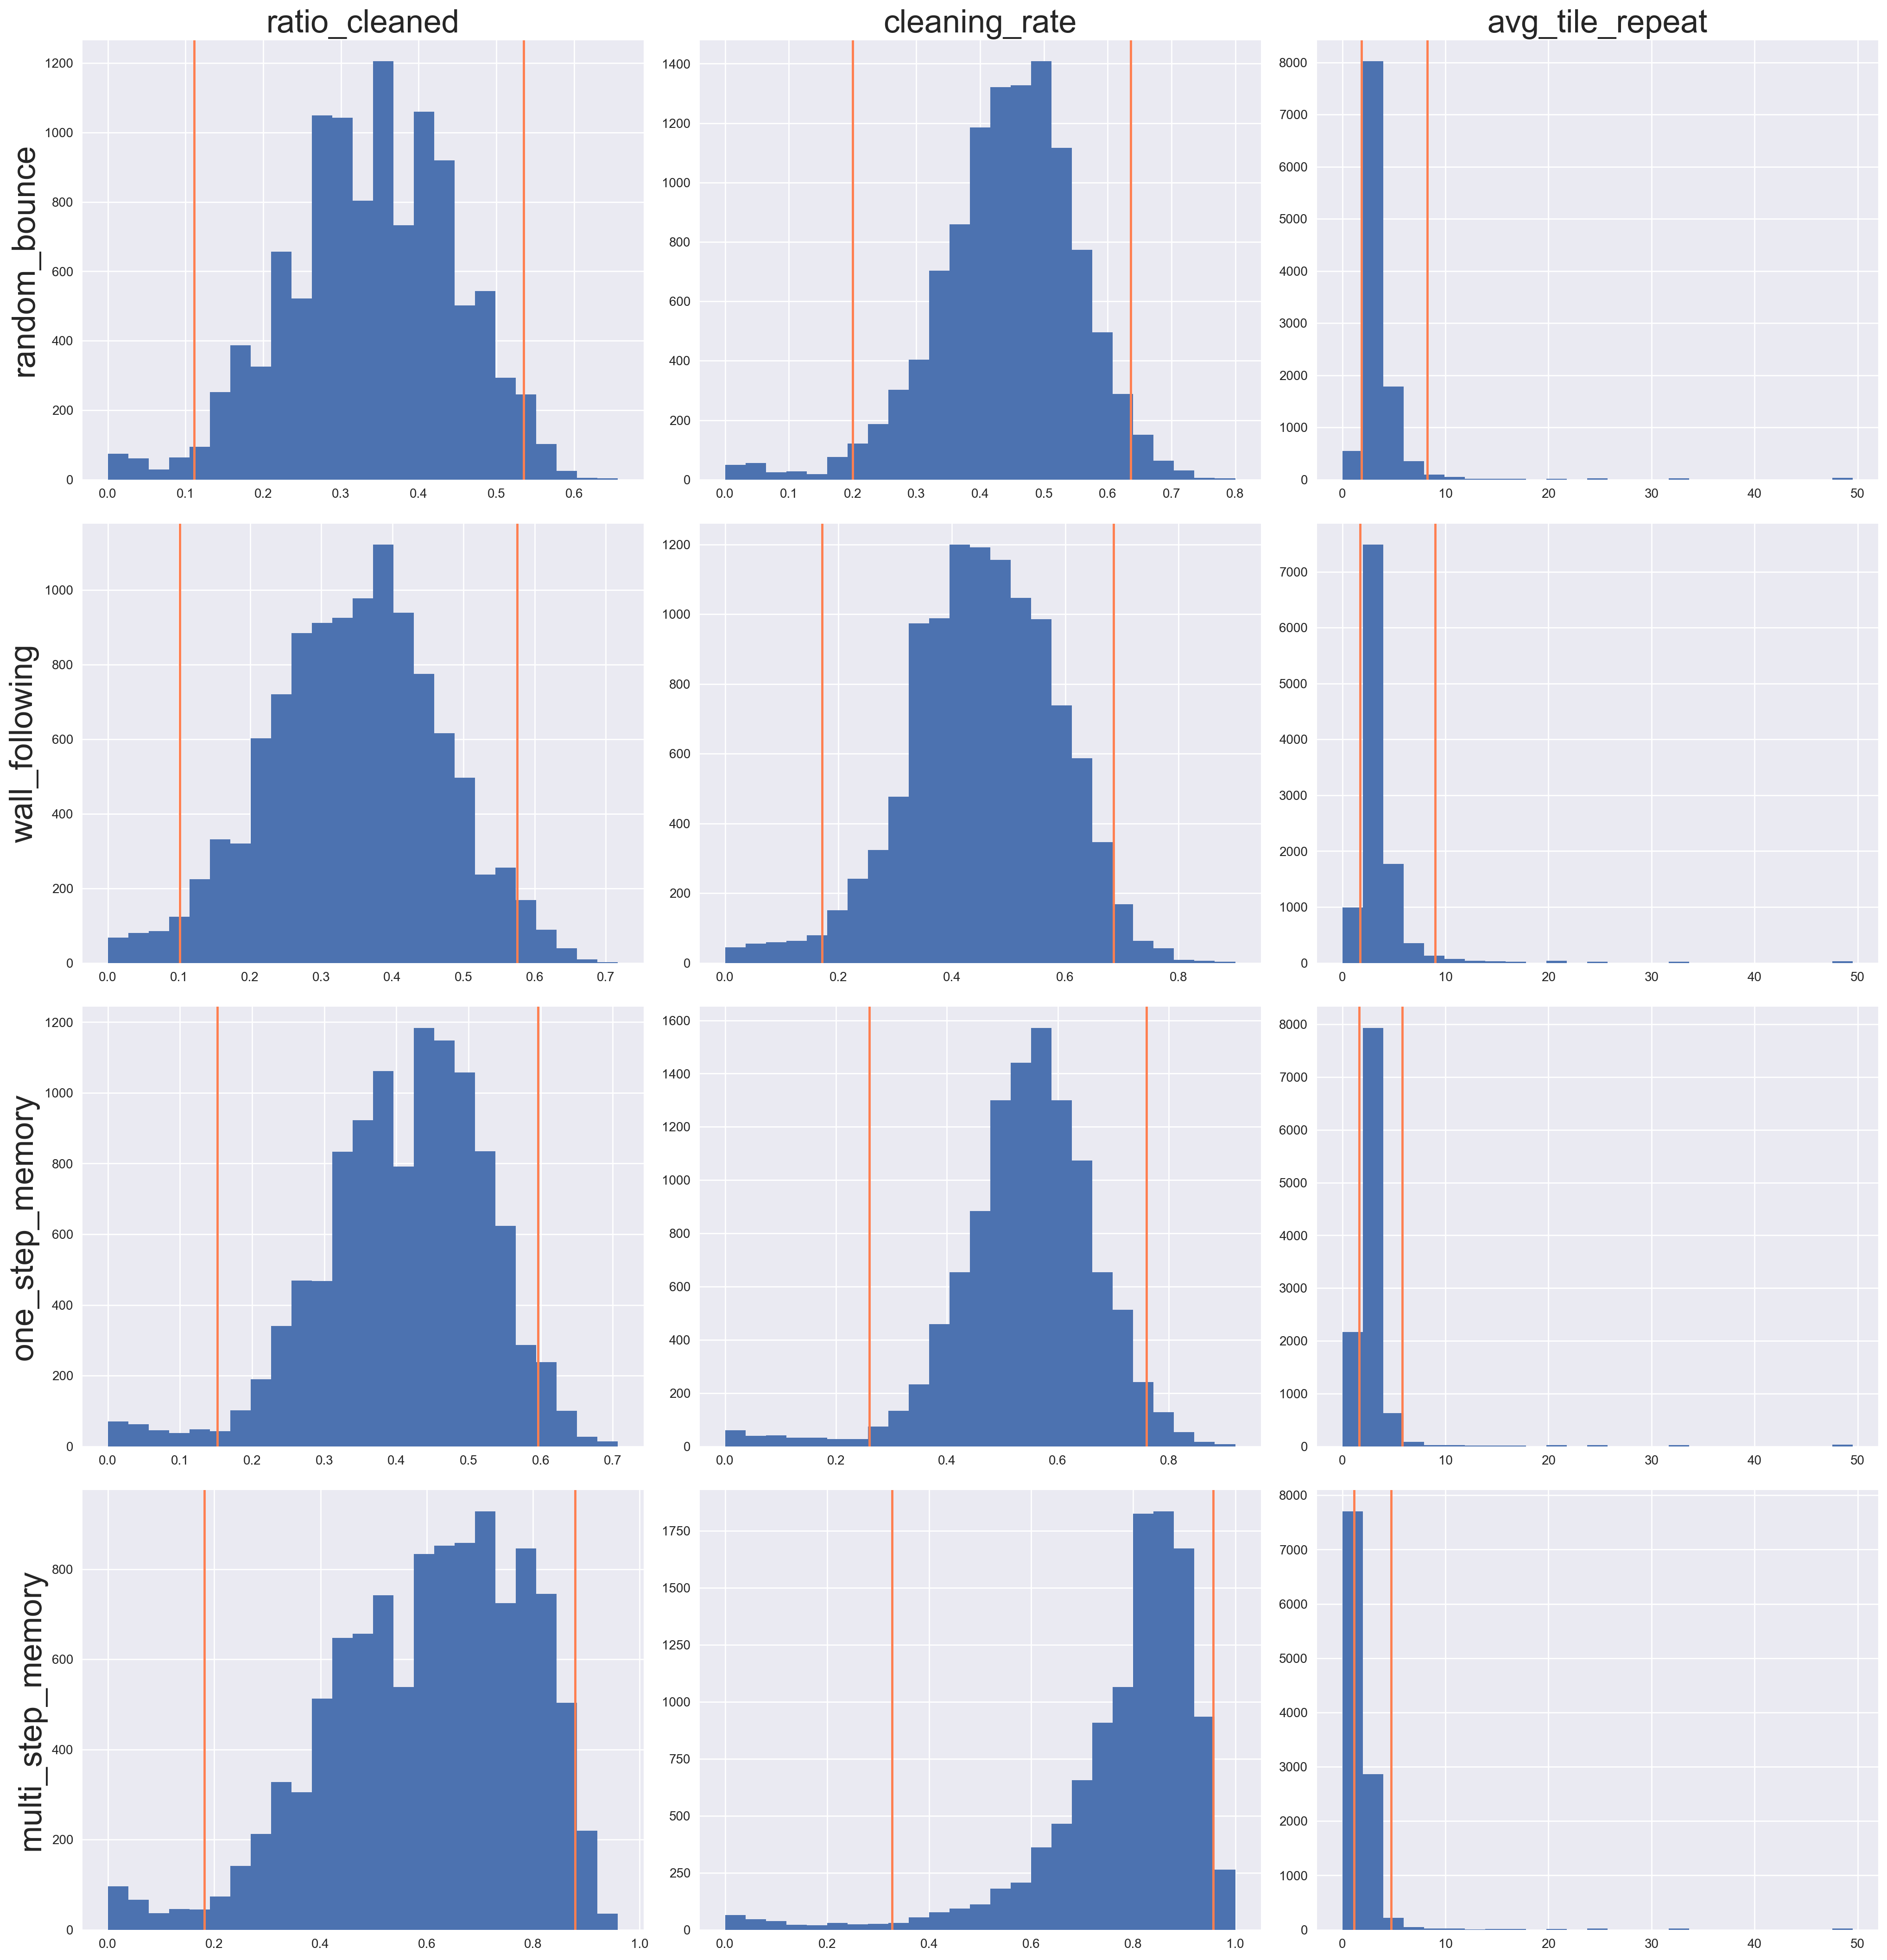

In [18]:
plot_subset_histograms(results_df_med)


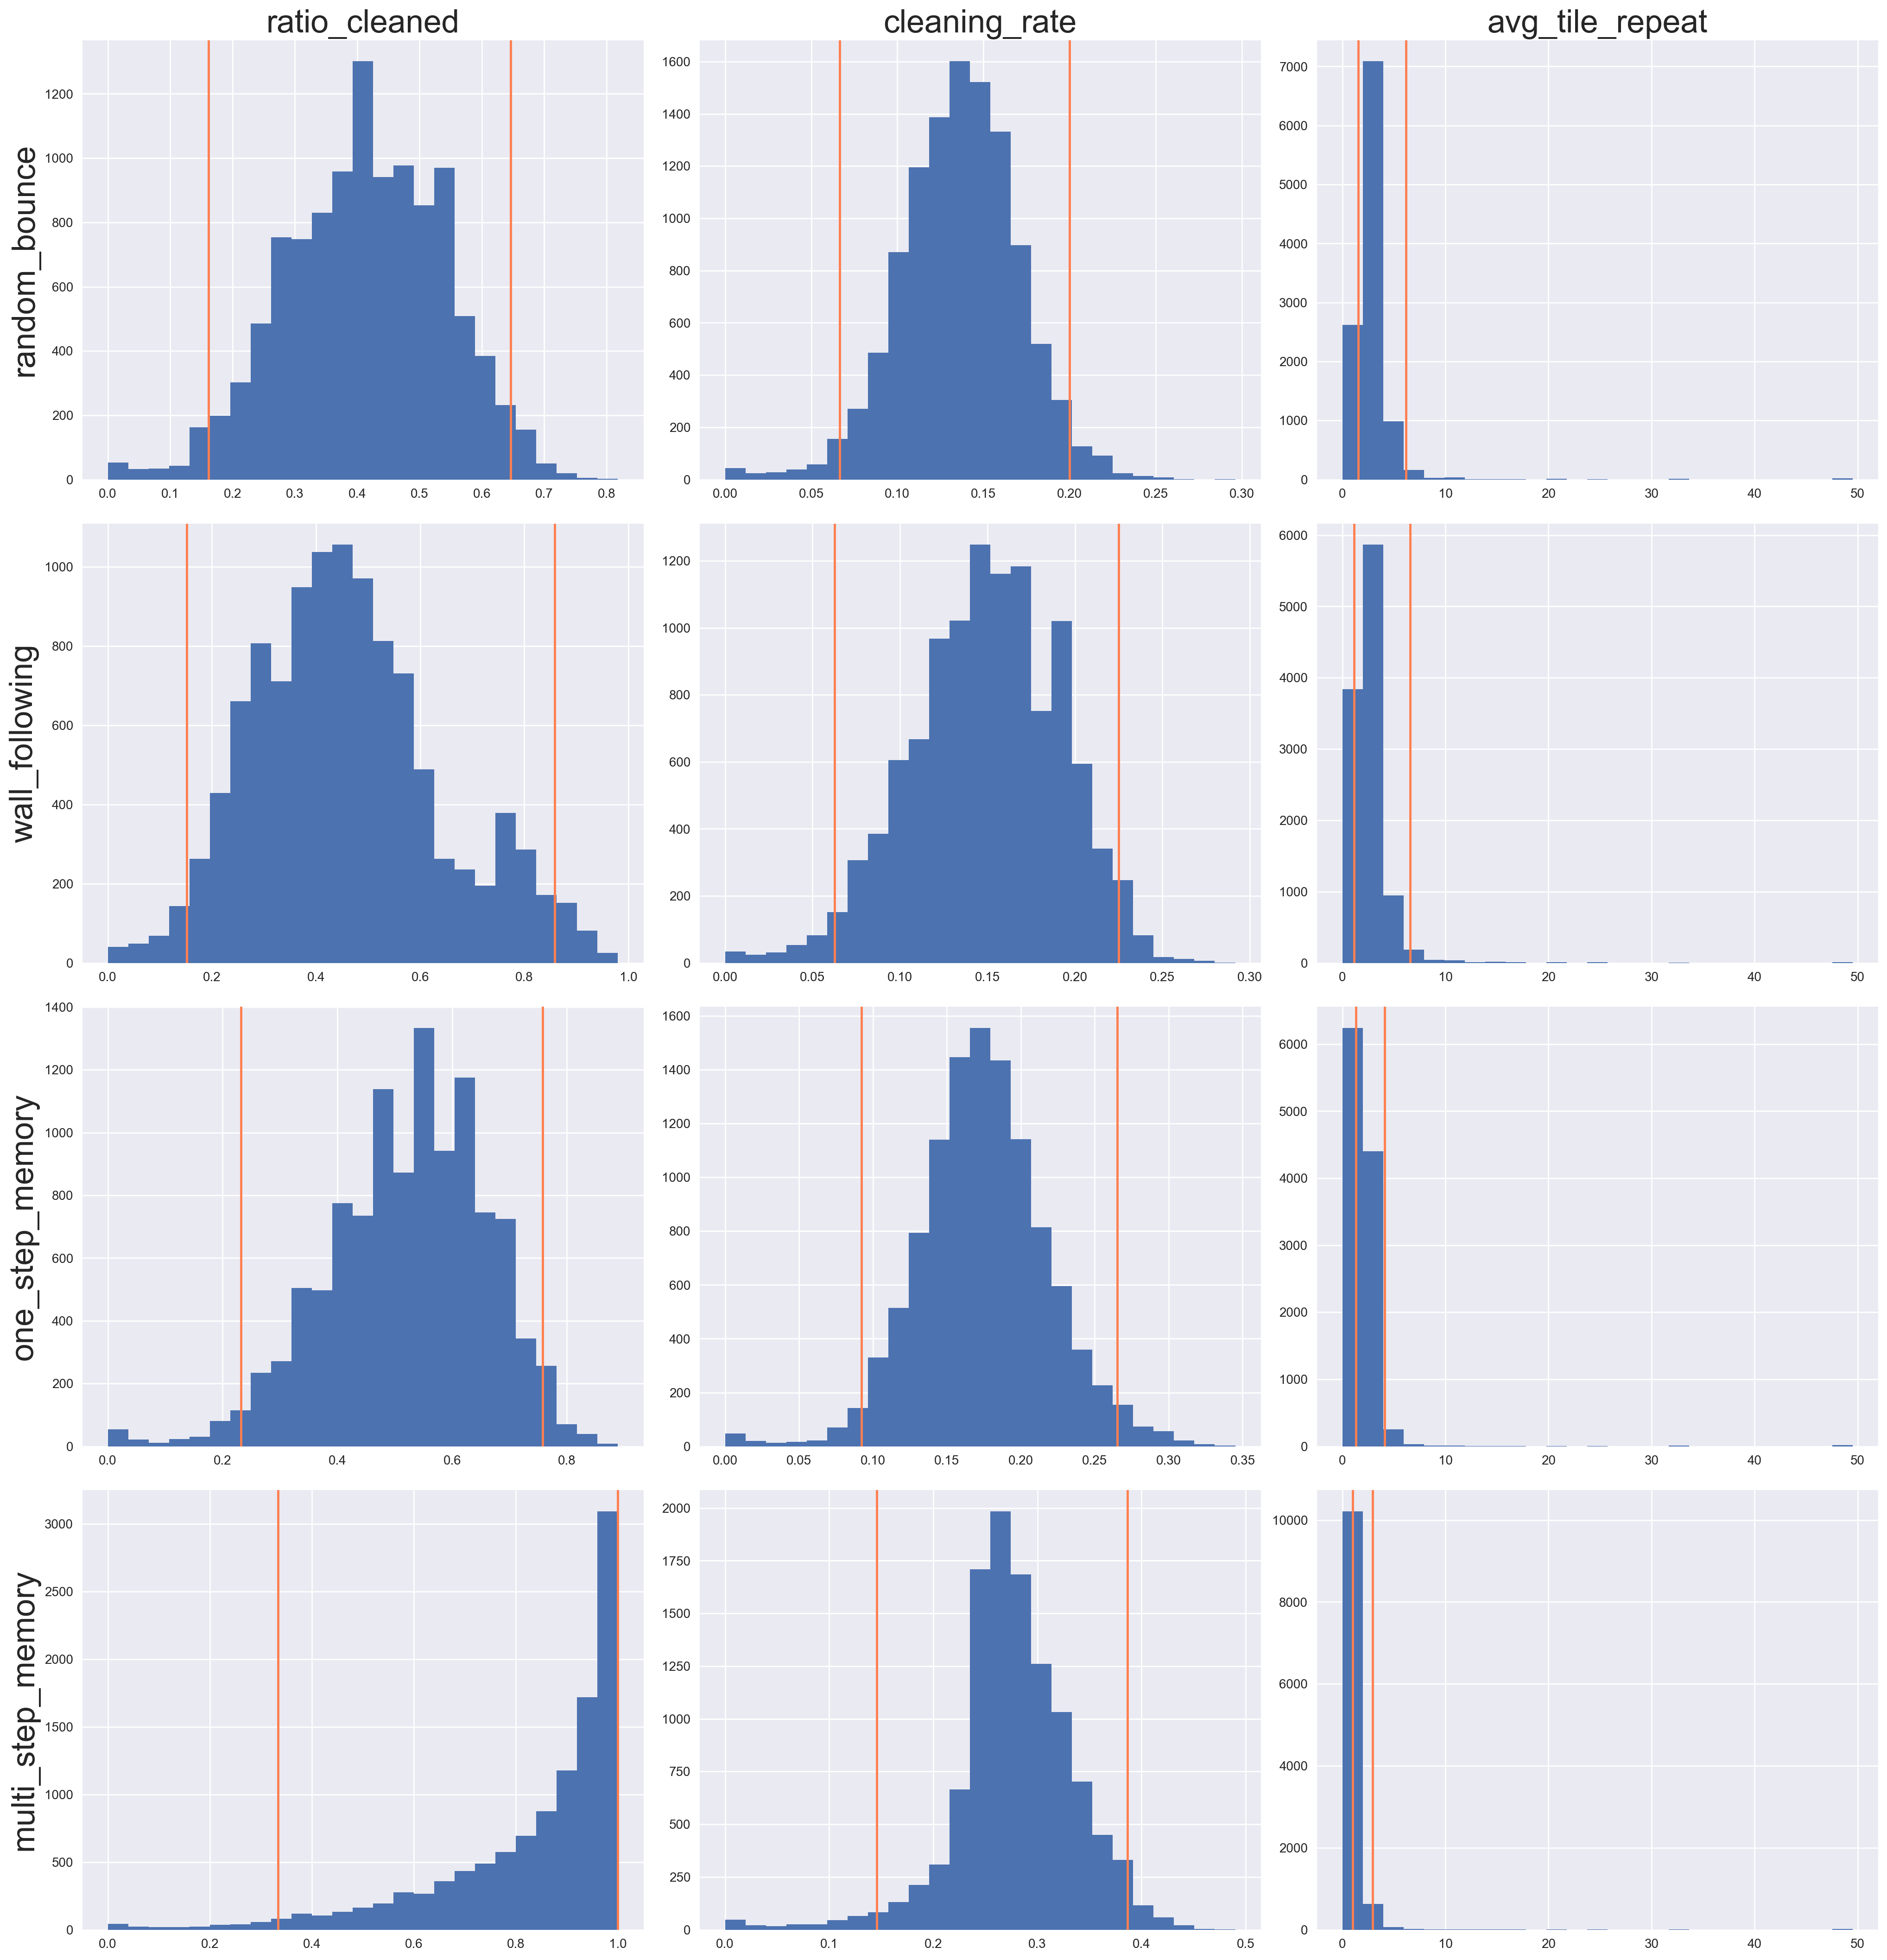

In [19]:
plot_subset_histograms(results_df_big)


<h2>Conclusion</h2>

<h3>Best Roomba Strategy</h3>

References

Woodford, C. (2018, December 17). How do Roomba robot vacuum cleaners work? Retrieved April 24, 2019, from https://www.explainthatstuff.com/how-roomba-works.html

FA
#algorithms
#descriptivestats
#distributions
#probability?

CS
#strategize
#responsibility

EA
#decisionselection
#sampling